# SUPPLEMENTARY FIGURES
RUN THIS NOTEBOOK TO GET ALL SUPPLEMENTARY FIGURES IN THE MANUSCRIPT

In [2]:
from functions import *

# SUPPLEMENTARY FIGURE 1

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


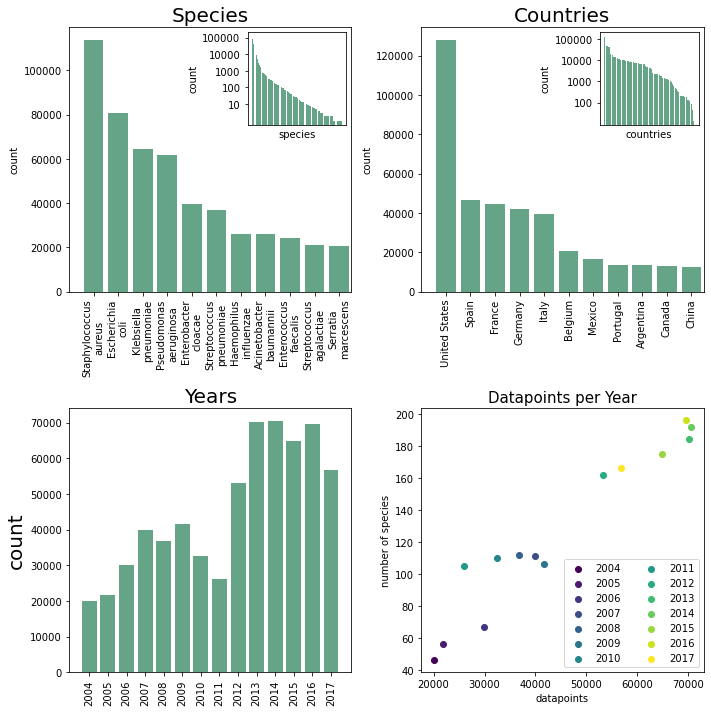

In [16]:
#DATASET DESCRIPTION
spC=pd.read_csv('data/key_Species.txt', '\t', header=None)
cC=pd.read_csv('data/key_Country.txt', '\t', header=None)
yC=pd.read_csv('data/key_Year.txt', '\t', header=None)
spC=spC.sort_values([1],ascending=False)
cC=cC.sort_values([1],ascending=False)
yC=yC.sort_values([1],ascending=False)
Lab=[z.replace(' ','\n') for z in spC[0]]


fig=plt.figure(figsize=(10,10))
color1='#006837'
#FIG S1A
ax=fig.add_subplot(2,2,1)
ax.bar(spC[0],spC[1], facecolor=color1, alpha=0.6)
ax.set_xticklabels(Lab, rotation=90)
ax.set_xlim([-1,10.5])
ax.set_ylabel('count')
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
#INSET
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
a=inset_axes(ax,width="35%",height="35%",loc='upper right')
a.bar(spC[0],spC[1], facecolor=color1, alpha=0.6)
a.set_yscale('log')
a.set_ylabel('count')
L=[10, 100, 1000, 10000, 100000]
a.set_yticks(L)
a.set_yticklabels(L, size=10)
a.set_xticks([])
a.set_xlabel('species', fontsize=10)
a.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Species', fontsize=20)

#FIG S1B
ax=fig.add_subplot(2,2,2)
ax.bar(cC[0],cC[1], facecolor=color1, alpha=0.6)
ax.set_xticklabels(cC[0], rotation=90)
ax.set_xlim([-1,10.5])
ax.set_ylabel('count')
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
a=inset_axes(ax,width="35%",height="35%",loc='upper right')
a.bar(cC[0],cC[1], facecolor=color1, alpha=0.6)
a.set_yscale('log')
a.set_ylabel('count', fontsize=10)
L=[100, 1000, 10000, 100000]
a.set_yticks(L)
a.set_yticklabels(L)
a.set_xticks([])
a.set_xlabel('countries', fontsize=10)
a.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Countries', fontsize=20)

#FIG S1C
ax=fig.add_subplot(2,2,3)
ax.bar(yC[0],yC[1], facecolor=color1, alpha=0.6)
ax.set_xticks(sorted(yC[0]))
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel('count', fontsize=20)
ax.set_yticklabels(ax.get_yticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Years', fontsize=20)

#FIG S1D
ax=fig.add_subplot(2,2,4)
DF=pd.read_csv('data/datapoints_per_year.csv')
yL=DF['Year'].tolist()
spL=DF['Species'].tolist()
dataL=DF['Datapoints'].tolist()
vals = np.linspace(0,1,len(spL))
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
labels=[str(z) for z in yL]
colors=[cmap(z) for z in vals]
for y1,y in enumerate(yL):
    ax.scatter(dataL[y1],spL[y1],c=[colors[y1]],label=labels[y1])
ax.legend(loc='lower right', ncol=2)
ax.set_xlabel('datapoints')
ax.set_ylabel('number of species')
ax.set_title('Datapoints per Year', fontsize=15)
fig.tight_layout()

# SUPPLEMENTARY FIGURE 2
See the section for Figure 1 in the main_figures.ipynb notebook

# SUPPLEMENTARY FIGURE 3

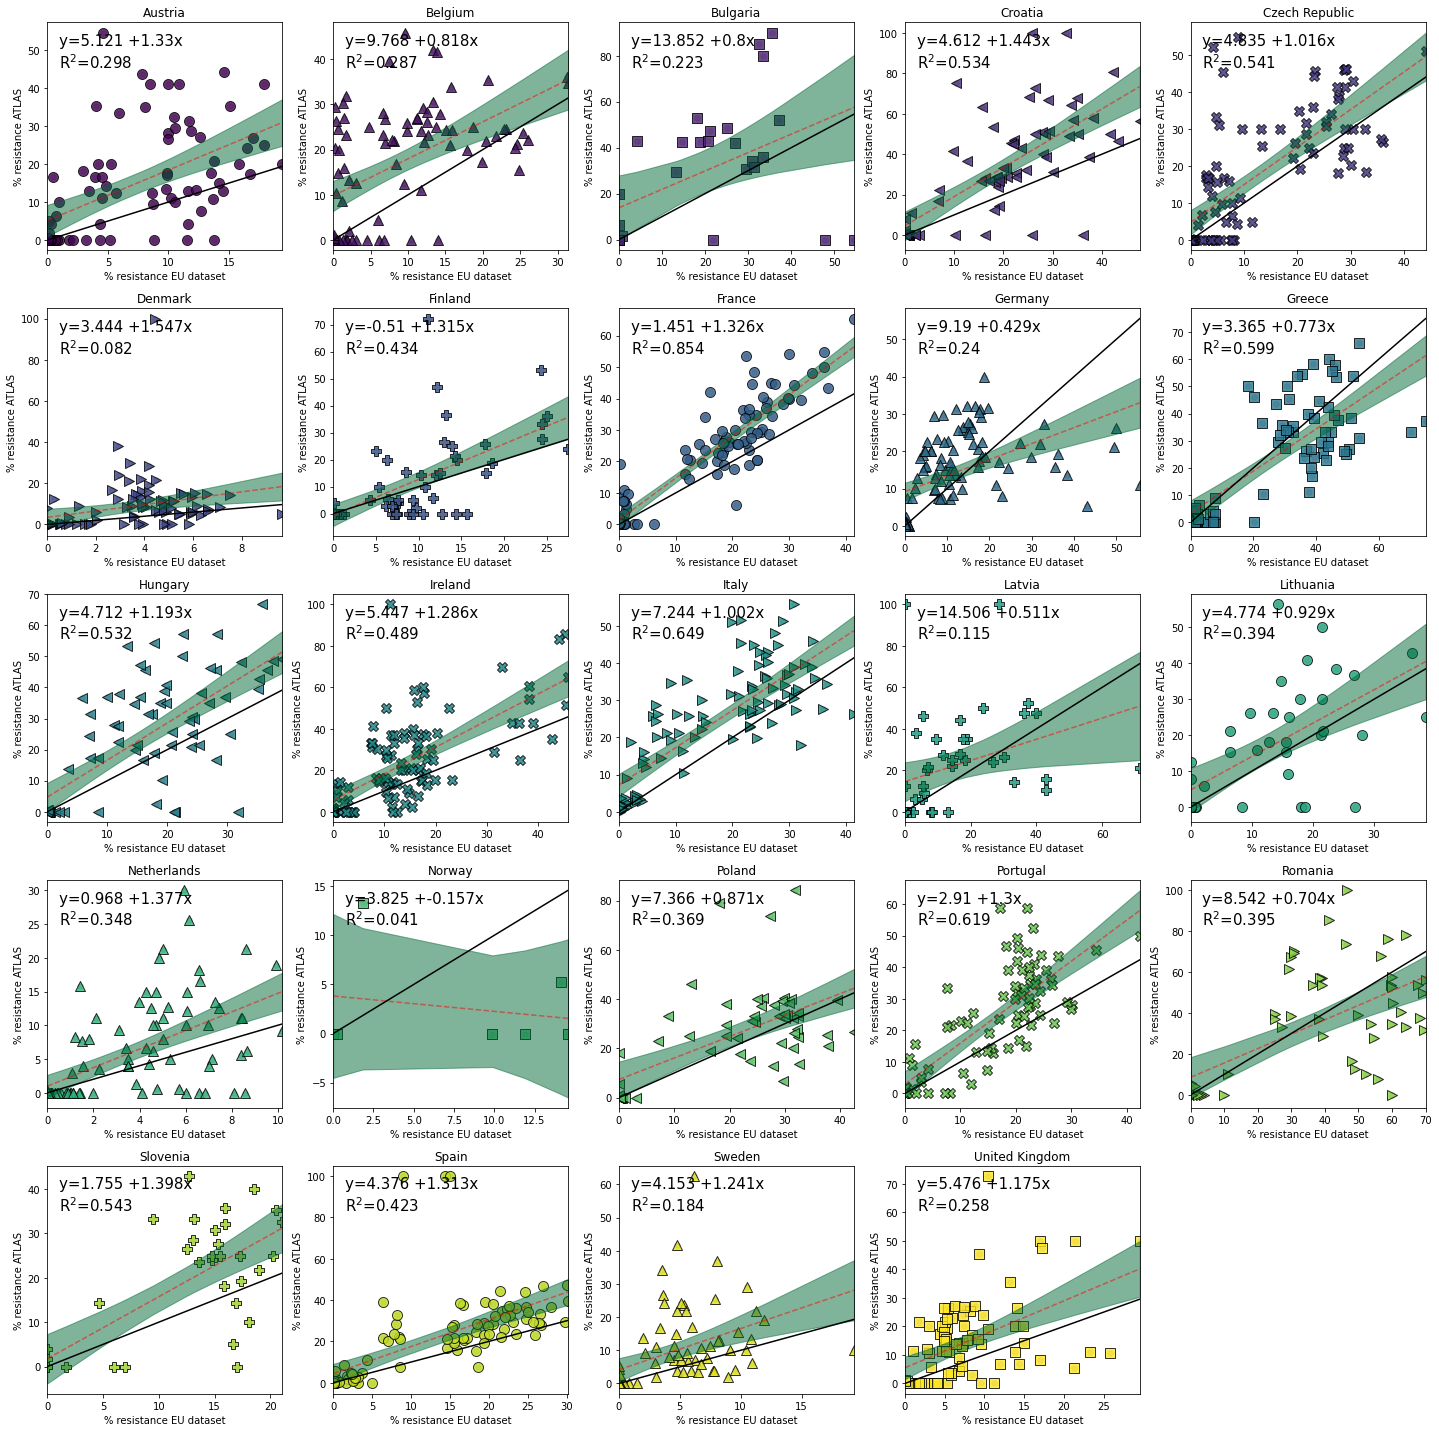

In [9]:
RD=pd.read_excel('data/atlas_vs_ecdc.xls')
#NOW PLOT EVERY COUNTRY
fig=plt.figure(figsize=(20,20))
cL=sorted(get_key(RD,'Country'))
#colors and symbols for each country
vals=np.linspace(0,1,len(cL))#each class will have one color
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
LS=['o', '^', 's', '<', 'X', '>', 'P']
sM={}
cM={}
for i1,country in enumerate(cL):
    cM[country]=cmap(i1/len(cL))
    sM[country]=LS[i1%len(LS)]
#PLOT
color1='#006837'
csDF=pd.read_csv('data/key_Country.txt', sep='\t', header=None, names=['Country','Size'])
for i1,country in enumerate(cL):
    ax=fig.add_subplot(5,5,i1+1)
    RDC=RD[RD.Country==country]
    xC=RDC['ECDCValue']
    yC=RDC['ATLASValue']
    x1,y_hat,lower,upper,R2, slope, intercept=LR(xC,yC)
    ax.scatter(xC,yC,s=30,c='k', alpha=0.2)
    ax.scatter(xC,yC,c=[cM[country]], s=100, edgecolors='k',alpha=0.8,
               marker=sM[country])
    ax.plot(x1,y_hat,'--r', alpha=0.5)
    ax.set_title(country)
    ax.fill_between(x1, lower, upper, color=color1, alpha=0.5)
    ax.plot(x1,x1,'-k')
    R2=np.round(R2*1000)/1000
    slope=np.round(slope*1000)/1000
    intercept=np.round(intercept*1000)/1000
    ax.text(0.05, 0.80, 'R$^2$='+str(R2), fontsize=15, transform=ax.transAxes)
    ax.text(0.05, 0.90, 'y='+str(intercept)+' +'+str(slope)+'x', fontsize=15, transform=ax.transAxes)
    ax.set_xlabel('% resistance EU dataset')
    ax.set_ylabel('% resistance ATLAS')
    ax.set_xlim([0,min(100,max(x1))])
fig.tight_layout()

# SUPPLEMENTARY FIGURE 4

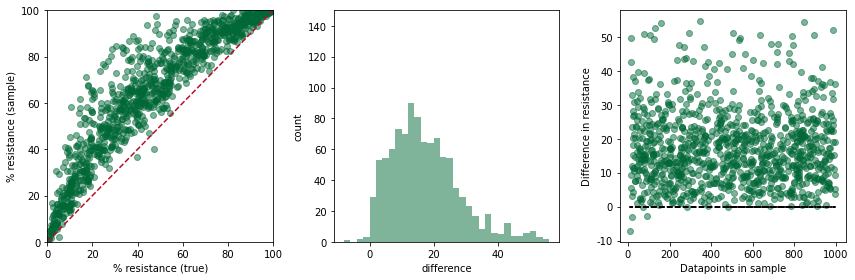

In [21]:
#BIASED SAMPLING
def sampling(x,a,minM,method='linear'):
    if method=='linear':
        return a*(x-minM)
    if method=='exponential':
        return a*np.exp(x-minM)
    if method=='monod':
        return (x-minM)/(1+a*(x-minM))
    if method=='uniform':
        return 1-a+(2*a-1)*np.heaviside(x,0)

def pop(muS,varS,muR,varR,fracS,N):
    #generate a population with two types, 
    fracR=1-fracS
    PS=np.random.normal(muS,varS,int(fracS*N))
    PR=np.random.normal(muR,varR,int(fracR*N))
    P=np.concatenate((PS,PR))
    return P

def sample(P,NS,a,minM,method):
    W=sampling(P,a,minM,method)
    W/=sum(W)
    S=np.random.choice(P,NS,p=W)
    return S

def synthetic_diff(method):
    rng=np.random.default_rng()
    N=100000
    muS=rng.uniform(-4,-1,1)
    varS=rng.uniform(0.1,1,1)
    muR=rng.uniform(0,3,1)
    varR=rng.uniform(0.1,1,1)
    fracS=rng.uniform(0,1,1)
    P=pop(muS,varS,muR,varR,fracS,N)
    NS=rng.integers(10,1000,1)
    a=rng.exponential(0.1,1)
    a=0.51
    S=sample(P,NS,a,min(P),method)
    rP=100*len(P[P>0])/N
    rS=100*len(S[S>0])/NS
    return rP, rS, NS

#generate sampling
L=1000
P=[]
S=[]
D=[]
N=[]
for l in range(L):
    rP, rS, NS=synthetic_diff('linear')
    P.append(rP)
    S.append(rS)
    D.append(rS-rP)
    N.append(NS)

color1='#006837'
color2='#B40E26'

fig=plt.figure(figsize=(12,4))
#SCATTERPLOT
ax=fig.add_subplot(1,3,1)
ax.plot(P,S,'o', color=color1, alpha=0.5)
xodr=np.linspace(0,100,100)
ax.plot(xodr,xodr,'--', color=color2)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_xlabel('% resistance (true)')
ax.set_ylabel('% resistance (sample)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))    
#HISTOGRAM
ax=fig.add_subplot(1,3,2)
bins=np.linspace(-100,100,101)
n, bins=np.histogram(D, bins=bins)
n1=[]
b1=[]
w=(bins[1]-bins[0])/2
for x,y in zip(bins,n):
    if y>0:
        n1.append(y)
        b1.append(x+w)
ax.bar(b1,n1, width=2*w, facecolor=color1, alpha=0.5)
ax.set_xlabel('difference')
ax.set_ylabel('count')         
ax.set_ylim([0,150])
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d')) 
#DIFF VERSUS N
X=N
Y=D
# fig=plt.figure()
# ax=plt.gca()
ax=fig.add_subplot(1,3,3)
ax.plot(X,Y,'o', color=color1, alpha=0.5)
ax.plot(X,[0 for _ in X],'--k')
ax.set_xlabel('Datapoints in sample')
ax.set_ylabel('Difference in resistance')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d')) 
fig.tight_layout()

# SUPPLEMENTARY FIGURE 5

/home/pcatalan/MEGA/notas/mic_paper/functions.py:406: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  H=ax.pcolormesh(X,Y,np.transpose(Z), edgecolors='face', cmap=cmap)
/home/pcatalan/MEGA/notas/mic_paper/functions.py:408: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticks())
/home/pcatalan/MEGA/notas/mic_paper/functions.py:414: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks())


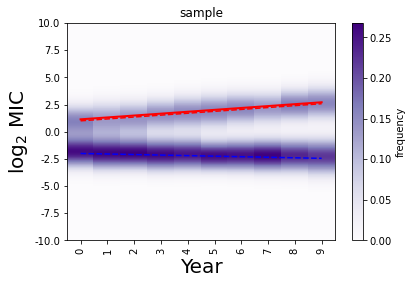

In [29]:
def extract_rcluster_sample(pY,sM):
    from sklearn import mixture
    #SMOOTH AND MIXTURE
    N=1000
    Z=np.zeros((len(pY), N))
    R=[]
    YR=[]
    ycount=0
    for y,smoothmic in zip(pY,sM):
        n_components=np.arange(1,5)
        minAIC=1e32
        minNC=0
        for n in n_components:
            gmm=mixture.GaussianMixture(n_components=n, max_iter=1000)
            gmm.fit(X=np.expand_dims(smoothmic, 1))
            AIC=gmm.bic(X=np.expand_dims(smoothmic, 1))
            if AIC>minAIC:
                minNC=n-1
                break
            minAIC=AIC
        gmm=mixture.GaussianMixture(n_components=minNC, max_iter=1000)
        X=np.expand_dims(smoothmic, 1)
        gmm.fit(X)
        # Evaluate GMM
        gmm_x = np.linspace(-10,10,N)
        gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1, 1)))
        for j,z in enumerate(gmm_y):
            Z[ycount,j]=z
        ycount+=1
        labels=gmm.predict(X)    
        #EXTRACT MOST RESISTANT COMPONENT
        maxV=-20
        imax=0
        for n in range(minNC):  
            a1=smoothmic[labels==n]  
            newM=a1.max()
            if newM>maxV:
                imax=labels==n
                maxV=newM
        R1=smoothmic[imax].tolist()
        R.append(R1)
        YR.append([y for _ in R1])
    R=[item for sublist in R for item in sublist]
    YR=[item for sublist in YR for item in sublist]
    return Z,np.array(R),np.array(YR),gmm_x

muS0=-2
muR0=1
var=1
fracS=0.75
tS=-0.05
tR=0.175
Y=list(range(10))
N=100000
NS=1000
muR=[muR0+tR*y for y in Y]
muS=[muS0+tS*y for y in Y]
ResP=[]
ResS=[]
MICY=np.array([])
MICS=np.array([])
sMIC=[]
pMIC=[]
minM=0
a=0.01
for i,y in enumerate(Y):
    P=pop(muS[i],var,muR[i],var,fracS,N)
    minM=min(P)
    S=sample(P,NS,a,minM,'monod')
    year=np.array([y for _ in S])
    MICY=np.concatenate((MICY,year))
    MICS=np.concatenate((MICS,S))
    pMIC.append(P)
    sMIC.append(S)
    rP=100*len(P[P>0])/N
    rS=100*len(S[S>0])/NS
    ResP.append(rP)
    ResS.append(rS)
Z,R,YR,gmm_X=extract_rcluster_sample(Y,sMIC)
fig=plt.figure()
ax=plt.gca()
plot_micdist(Z,Y,fig,ax,'sample')
#PLOT TRENDS OVER HEATMAP
xp=np.array(Y)
ax.plot(xp+0.5,muR,'r--')
ax.plot(xp+0.5,muS,'b--')
x1,y_hat,upper,lower,R2, slope, intercept=LR(YR,R)
yp=slope*xp+intercept
ax.plot(xp+0.5,yp,'r',lw=2)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('log$_2$ MIC', fontsize=20)
XL=np.array(Y)
ax.set_xticks(XL+0.5);

# SUPPLEMENTARY FIGURE 6

## SUPPLEMENTARY FIGURE 6A

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator


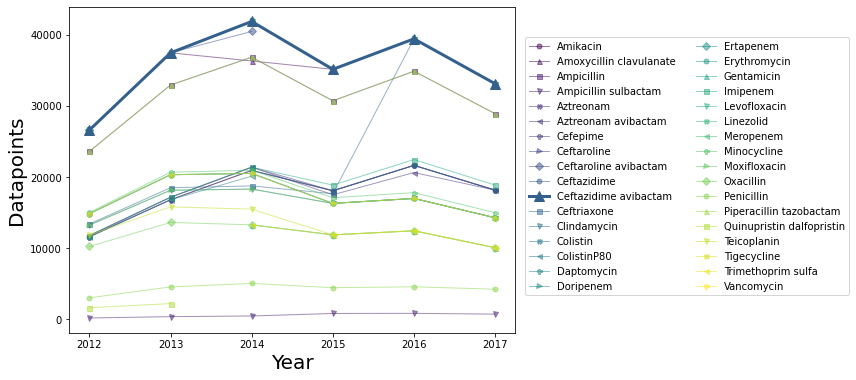

In [32]:
DFT=pd.read_csv('data/drug_testing_inform.csv')
drugs=get_key(DFT, 'Antibiotic')
vals=np.linspace(0,1,len(drugs))#each class will have one color
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
#SYMBOLS AND COLORS FOR EACH ANTIBIOTIC
LS=['o', '^', 's', 'v', 'X', '<', 'P', '>', 'D']
LM={}
LC={}
for count, dr in enumerate(drugs):
    LM[dr]=LS[count%len(LS)]
    LC[dr]=cmap(count/len(drugs))

#FIGURE
fig=plt.figure(figsize=(8,6))
ax=plt.gca()
for dr in drugs:
    DFdr=DFT[DFT.Antibiotic==dr]
    x=DFdr.Year
    y=DFdr.Datapoints
    if dr!='Ceftazidime avibactam':
        ax.plot(x,y,color=LC[dr],marker=LM[dr], 
            markersize=5, linewidth=1, label=dr, alpha=0.5, zorder=1)
    if dr=='Ceftazidime avibactam':
        ax.plot(x,y,color=LC[dr],marker=LM[dr], 
            markersize=10, linewidth=3, alpha=1, label=dr, zorder=2)
        
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Datapoints', fontsize=20)
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.set_xticklabels(ax.get_xticks(), size=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.legend(loc='lower left', bbox_to_anchor=[1.01, 0.1, 0.3, 0.3],
          bbox_transform=ax.transAxes, ncol=2);

## SUPPLEMENTARY FIGURE 6B

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


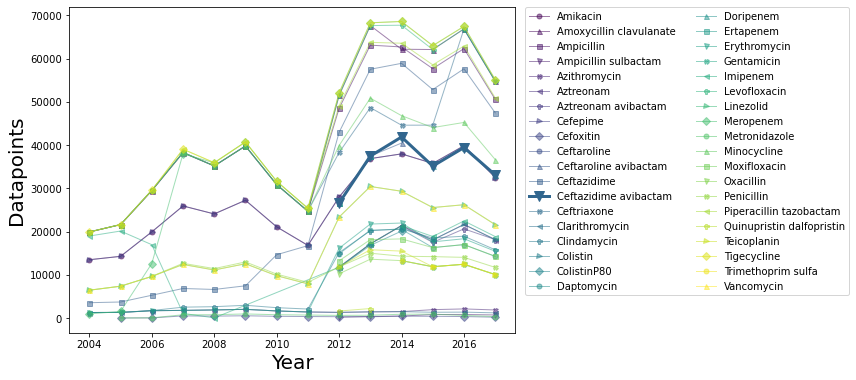

In [33]:
DFT=pd.read_csv('data/drug_testing_atlas.csv')
drugs=get_key(DFT, 'Antibiotic')
vals=np.linspace(0,1,len(drugs))#each class will have one color
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
#SYMBOLS AND COLORS FOR EACH ANTIBIOTIC
LS=['o', '^', 's', 'v', 'X', '<', 'P', '>', 'D']
LM={}
LC={}
for count, dr in enumerate(drugs):
    LM[dr]=LS[count%len(LS)]
    LC[dr]=cmap(count/len(drugs))

#FIGURE
fig=plt.figure(figsize=(8,6))
ax=plt.gca()
for dr in drugs:
    DFdr=DFT[DFT.Antibiotic==dr]
    x=DFdr.Year
    y=DFdr.Datapoints
    if dr!='Ceftazidime avibactam':
        ax.plot(x,y,color=LC[dr],marker=LM[dr], 
            markersize=5, linewidth=1, label=dr, alpha=0.5, zorder=1)
    if dr=='Ceftazidime avibactam':
        ax.plot(x,y,color=LC[dr],marker=LM[dr], 
            markersize=10, linewidth=3, alpha=1, label=dr, zorder=2)
        
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Datapoints', fontsize=20)
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.set_xticklabels(ax.get_xticks(), size=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.legend(loc='lower left', bbox_to_anchor=[1.01, 0.1, 0.3, 0.3],
          bbox_transform=ax.transAxes, ncol=2);

# SUPPLEMENTARY FIGURE 7

## SUPPLEMENTARY FIGURE 7A

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5

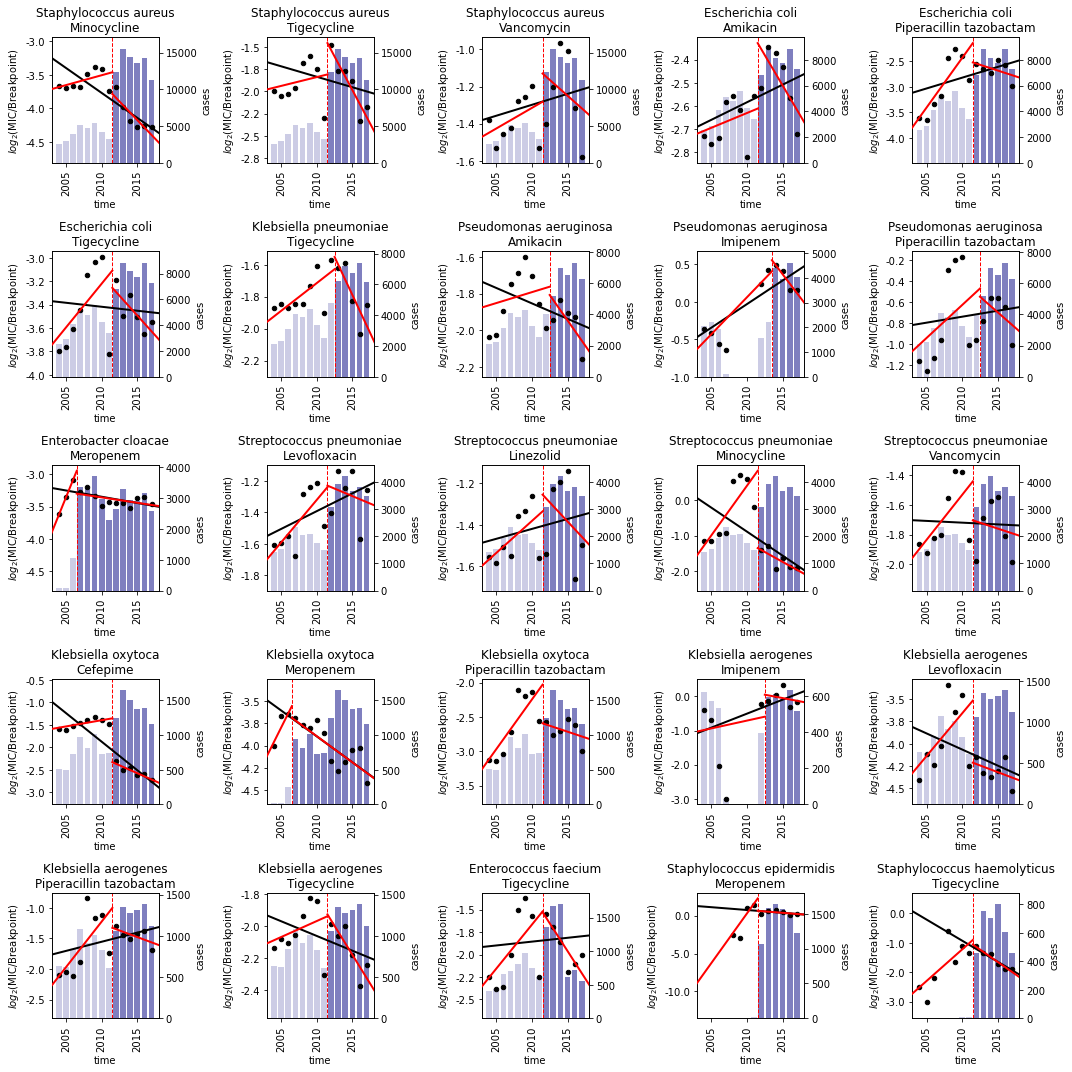

In [34]:
BPDF=pd.read_csv('data/breakpoints.csv')
DF=pd.read_csv('data/average_mic_per_year_complete.csv')
Ch=pd.read_csv('data/changepoint_analysis_change_in_mic.csv')
Ch=Ch[(Ch['Slope Before']>0) & (Ch['Slope After']<0)]
Ch=Ch.reset_index(drop=True)
nrows=5
ncols=5
fig=plt.figure(figsize=(15,15))
for index, row in Ch.iterrows():
    sp=row['Species']
    dr=row['Antibiotic']
    BP=0
    BPsp=BPDF[(BPDF.Species==sp) & (BPDF.Antibiotic==dr)]
    if not BPsp.empty:
        BP=BPsp['S'].mean()
    tau=row['Changepoint']
    s1=row['Slope After']
    i1=row['Intercept After']
    s2=row['Slope Before']
    i2=row['Intercept Before']
    s0=row['Slope Global']
    i0=row['Intercept Global']
    DFsp=DF[(DF.Species==sp) & (DF.Antibiotic==dr)]
    YMIC=DFsp['Year'].tolist()
    MIC=DFsp['Average MIC'].tolist()
    totalcases=DFsp['Number of cases'].tolist()
    ax=fig.add_subplot(nrows, ncols, index+1)
    ax2=ax.twinx()
    ax.set_zorder(ax2.get_zorder()+1)# put ax in front of ax2
    ax.patch.set_visible(False)# hide the 'canvas'
    yT=YMIC.index(tau)
    ax2.bar(YMIC[0:yT], totalcases[0:yT], facecolor='navy', alpha=0.2)
    ax2.bar(YMIC[yT::], totalcases[yT::], facecolor='navy', alpha=0.5)
    ax2.plot([tau-0.5,tau-0.5],[0,1.1*np.max(totalcases)], '--r', linewidth=1)
    ax.scatter(YMIC, MIC, color='k', s=20, label='MIC')
    #PLOT SLOPE
    yM=np.linspace(2000,2020,100)
    yp=[i0+s0*z for z in yM]
    if s0!=0:
        ax.plot(yM,yp, 'k', zorder=10, linewidth=2)
    #PLOT SECOND SLOPE
    yM=np.linspace(tau-0.5,2020,100)
    yp=[i1+s1*z for z in yM]
    if True:#s1!=0:
        ax.plot(yM,yp, 'r', zorder=10, linewidth=2)
    #PLOT THIRD SLOPE
    yM=np.linspace(2000,tau-0.5,100)
    yp=[i2+s2*z for z in yM]
    if True:#s2!=0:
        ax.plot(yM,yp, 'r', zorder=10, linewidth=2)
    #PLOT DETAILS
    ax.set_xlabel('time')
    ax.set_ylabel('$log_2$(MIC/Breakpoint)')
    ax2.set_ylabel('cases')
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.set_yticklabels(ax.get_yticks())
    if max(totalcases)<4:
        ax2.set_yticks(range(0, 1+max(totalcases)))
    ax2.set_yticklabels(ax2.get_yticks())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.set_title(sp+'\n'+dr)
    ax.set_xlim([2003,2018])
    ax2.set_ylim([0,1.1*np.max(totalcases)])
fig.tight_layout()

## SUPPLEMENTARY FIGURE 7B

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5

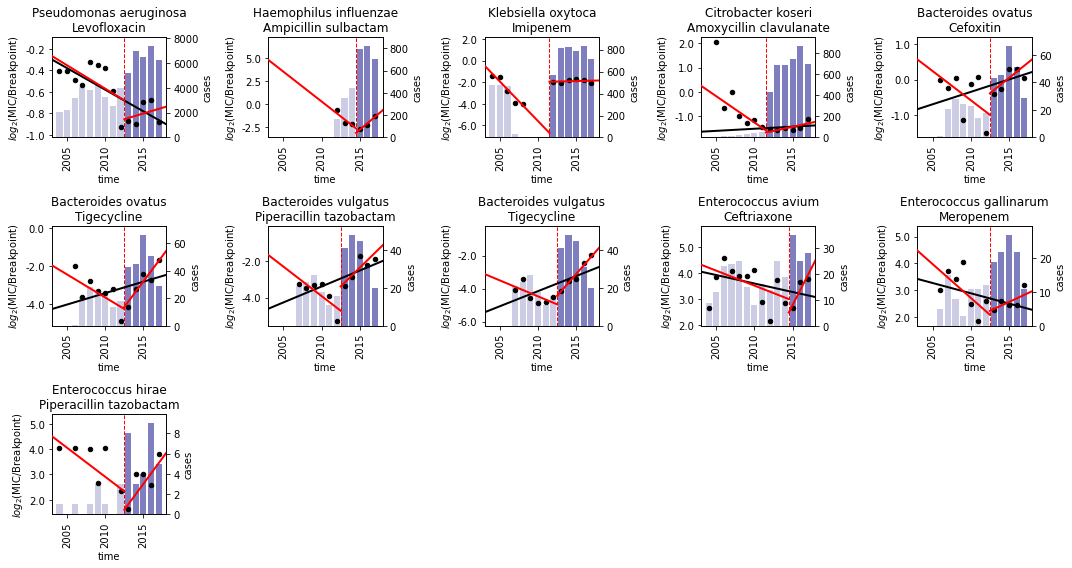

In [35]:
DF=pd.read_csv('data/average_mic_per_year_complete.csv')
Ch=pd.read_csv('data/changepoint_analysis_change_in_mic.csv')
Ch=Ch[(Ch['Slope Before']<0) & (Ch['Slope After']>0)]
Ch=Ch.reset_index(drop=True)
nrows=3
ncols=5
fig=plt.figure(figsize=(15,8))
for index, row in Ch.iterrows():
    sp=row['Species']
    dr=row['Antibiotic']
    tau=row['Changepoint']
    s1=row['Slope After']
    i1=row['Intercept After']
    s2=row['Slope Before']
    i2=row['Intercept Before']
    s0=row['Slope Global']
    i0=row['Intercept Global']
    DFsp=DF[(DF.Species==sp) & (DF.Antibiotic==dr)]
    YMIC=DFsp['Year'].tolist()
    MIC=DFsp['Average MIC'].tolist()
    totalcases=DFsp['Number of cases'].tolist()
    ax=fig.add_subplot(nrows, ncols, index+1)
    ax2=ax.twinx()
    ax.set_zorder(ax2.get_zorder()+1)# put ax in front of ax2
    ax.patch.set_visible(False)# hide the 'canvas'
    yT=YMIC.index(tau)
    ax2.bar(YMIC[0:yT], totalcases[0:yT], facecolor='navy', alpha=0.2)
    ax2.bar(YMIC[yT::], totalcases[yT::], facecolor='navy', alpha=0.5)
    ax2.plot([tau-0.5,tau-0.5],[0,1.1*np.max(totalcases)], '--r', linewidth=1)
    ax.scatter(YMIC, MIC, color='k', s=20, label='MIC')
    #PLOT SLOPE
    yM=np.linspace(2000,2020,100)
    yp=[i0+s0*z for z in yM]
    if s0!=0:
        ax.plot(yM,yp, 'k', zorder=10, linewidth=2)
    #PLOT SECOND SLOPE
    yM=np.linspace(tau-0.5,2020,100)
    yp=[i1+s1*z for z in yM]
    if s1!=0:
        ax.plot(yM,yp, 'r', zorder=10, linewidth=2)
    #PLOT THIRD SLOPE
    yM=np.linspace(2000,tau-0.5,100)
    yp=[i2+s2*z for z in yM]
    if s2!=0:
        ax.plot(yM,yp, 'r', zorder=10, linewidth=2)
    #PLOT DETAILS
    ax.set_xlabel('time')
    ax.set_ylabel('$log_2$(MIC/Breakpoint)')
    ax2.set_ylabel('cases')
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.set_yticklabels(ax.get_yticks())
    if max(totalcases)<4:
        ax2.set_yticks(range(0, 1+max(totalcases)))
    ax2.set_yticklabels(ax2.get_yticks())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.set_title(sp+'\n'+dr)
    ax.set_xlim([2003,2018])
    ax2.set_ylim([0,1.1*np.max(totalcases)])
fig.tight_layout()

# SUPPLEMENTARY FIGURE 8

## SUPPLEMENTARY FIGURE 8A

/home/pcatalan/MEGA/notas/mic_paper/functions.py:381: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticks())


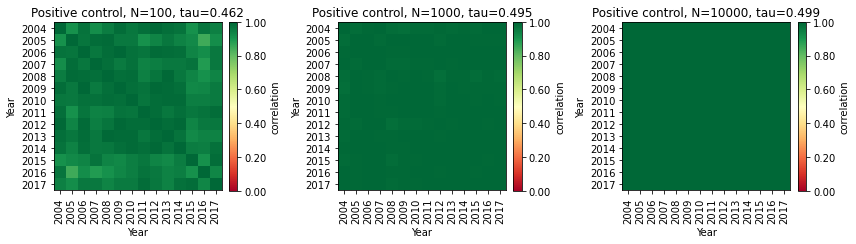

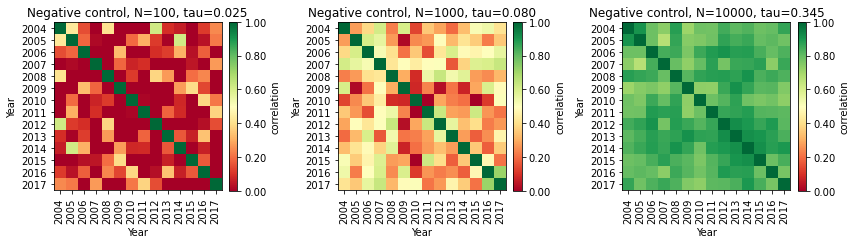

In [36]:
#CONTROLS
Y=range(2004,2018)
bins=np.arange(-10.5,11.5,1)
z=np.zeros(len(bins))
NL=[100,1000,10000]
#POSITIVE CONTROL
fig=plt.figure(figsize=(12,36))
for i,N in enumerate(NL):
    H=[z for y in Y]
    for j,y in enumerate(Y):
        RD=np.random.normal(0.0,1.0,N)
        h,b1=np.histogram(RD, bins=bins, density=True)
        H[j]=h
    H=np.array(H)
    R=np.corrcoef(H)
    tau,tauN=tautest(R)
    ax=fig.add_subplot(1,len(NL),i+1)
    I=plot_corr(R,Y,ax,fig,'Positive control, N='+str(N)+', tau='+str(tau)[0:5])
fig.tight_layout()

#NEGATIVE CONTROL
fig=plt.figure(figsize=(12,36))
for i,N in enumerate(NL):
    H=[z for y in Y]
    for j,y in enumerate(Y):
        RD=np.random.randint(-10,10+1,N)+np.random.normal(0,1,N)
        h,b1=np.histogram(RD, bins=bins, density=True)
        H[j]=h
    H=np.array(H)
    R=np.corrcoef(H)
    tau,tauN=tautest(R)
    ax=fig.add_subplot(1,len(NL),i+1)
    I=plot_corr(R,Y,ax,fig,'Negative control, N='+str(N)+', tau='+str(tau)[0:5])
fig.tight_layout()

## SUPPLEMENTARY FIGURE 8B

T-test for tau : p-value= 0.0


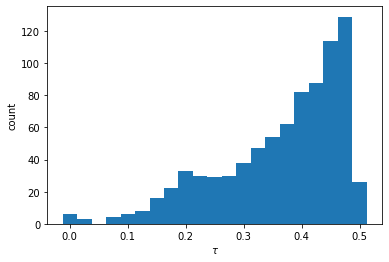

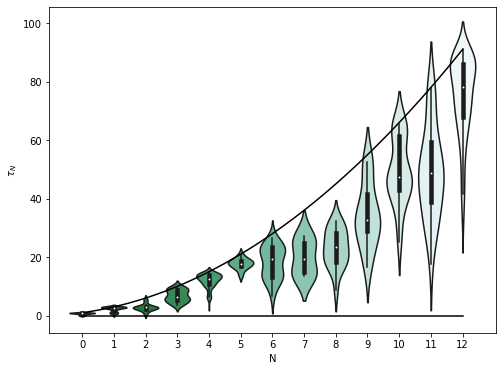

In [37]:
DFdist=pd.read_csv('results/correlations/tau_test.csv')
#T-TEST FOR ALL ATLAS
T=stats.ttest_1samp(DFdist['Tau'],0.0)
print('T-test for tau',': p-value=',T[1])
#T-TEST FOR EVERY N
for N in range(2,15):
    DFN=DFdist[DFdist['N']==N]
    TN=stats.ttest_1samp(DFN['TauN'],N*(N-1)/2)
    #print('T-test for tau_',N,': p-value=',TN[1])

#PLOT HISTOGRAM OF TAUS
bins=list(np.arange(0.0,0.55,0.025))
fig=plt.figure()
ax=plt.gca()
n1,b1=np.histogram(DFdist['Tau'], bins=bins)
width=bins[1]-bins[0]
ax.bar(b1[0:-1],n1,width=width)
ax.set_xlabel('$\\tau$')
ax.set_ylabel('count')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

#PLOT TAU VERSUS N
fig=plt.figure(figsize=(8,6))
ax=sns.violinplot(y="TauN",x="N",data=DFdist, scale='width',
                  palette='BuGn_r', inner='box')
ax.set_ylabel('$\\tau_N$')
xp=np.linspace(0,12,100)
xp2=np.linspace(2,14,100)
yp=xp2*(xp2-1)/2
ax.plot(xp,yp,'k-')
ax.plot(xp,[0 for z in xp],'k-')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# SUPPLEMENTARY FIGURE 9

/home/pcatalan/MEGA/notas/mic_paper/functions.py:381: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticks())


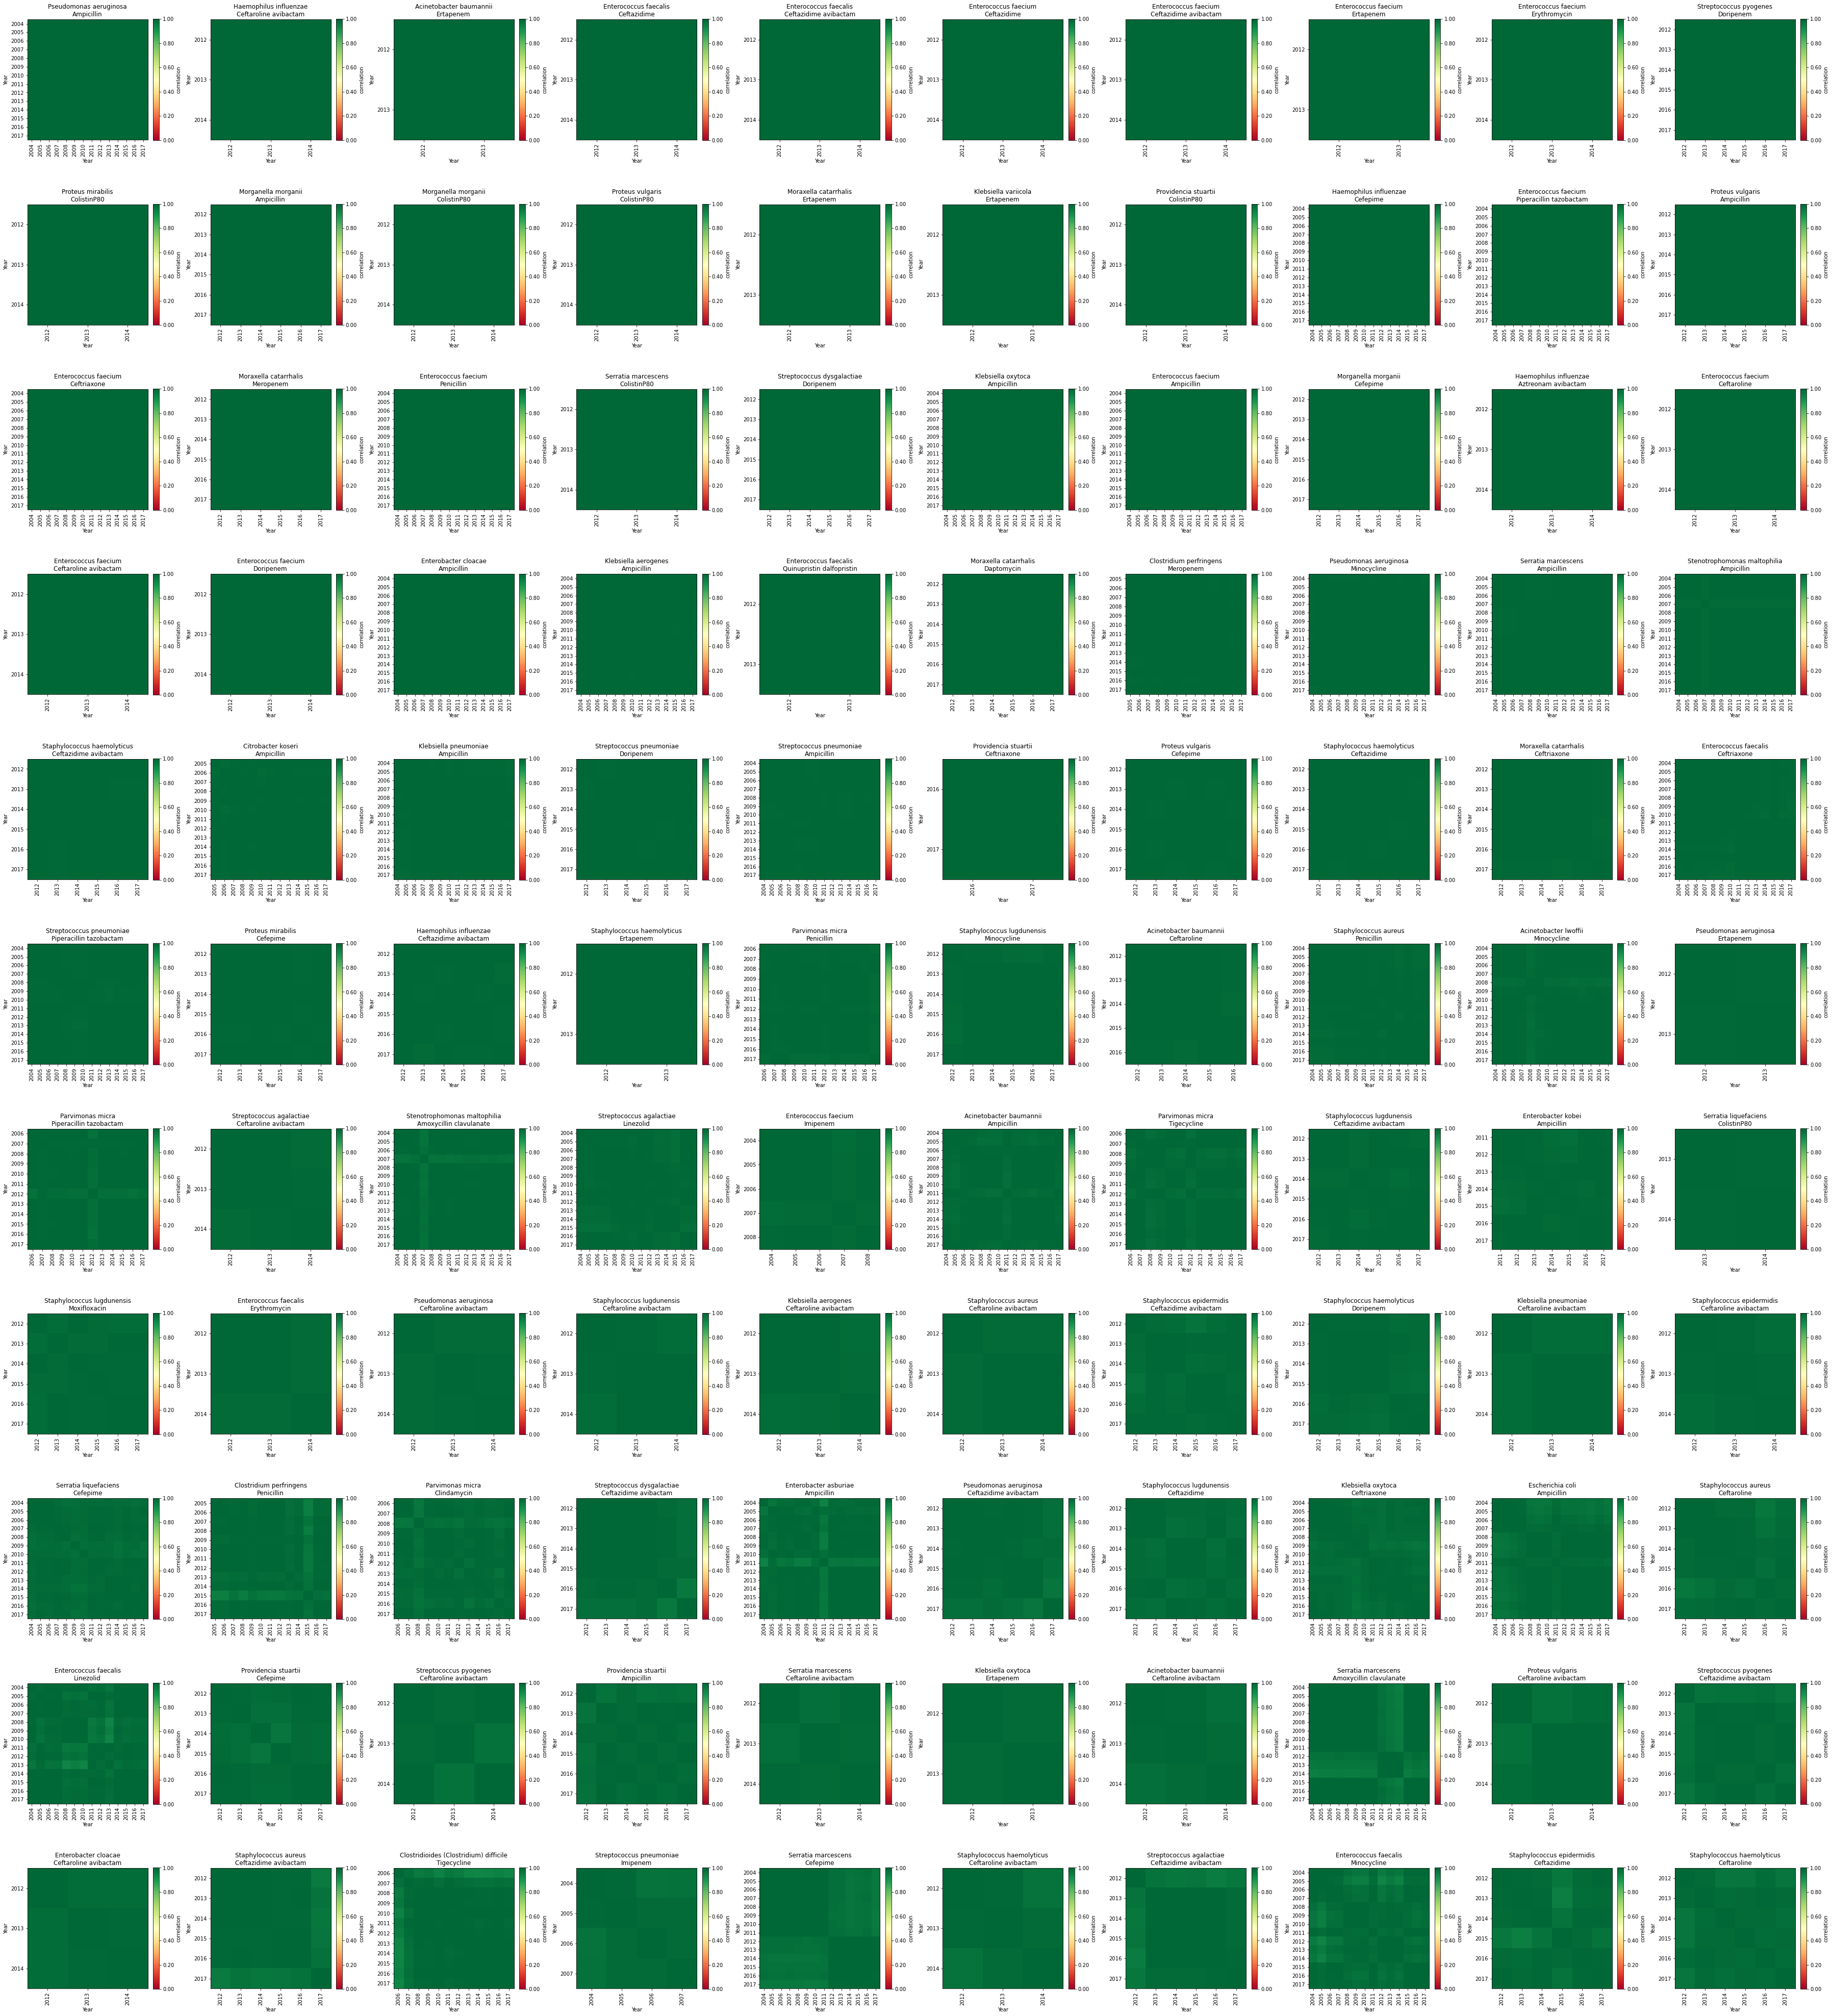

In [38]:
DFdist=pd.read_csv('results/correlations/tau_test.csv')
DFdist=DFdist[DFdist.Tau>0.485]
maxcols=10
maxrows=int(len(DFdist)/maxcols+1)
fig=plt.figure(figsize=(5*maxcols,5*maxrows))
#GENERATE FIGURE
for index,row in DFdist.iterrows():
    sp=row['Species']
    c1=row['Antibiotic']
    ax=fig.add_subplot(maxrows,maxcols,index+1)
    R,Y=read_corr(sp,c1)
    I=plot_corr(R,Y,ax,fig,sp+'\n'+c1)
fig.tight_layout()

# SUPPLEMENTARY FIGURE 10

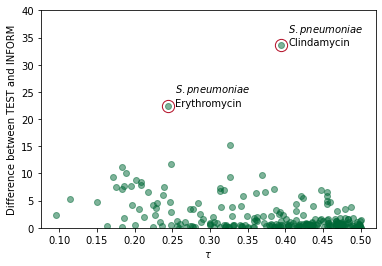

In [40]:
Diff=pd.read_csv('results/Rcluster/resistant_cluster_values_test_vs_inform.csv')
Tau=pd.read_csv('results/correlations/tau_test.csv')

tau=[]
diff=[]
for index,row in Diff.iterrows():
    sp=row['Species']
    dr=row['Antibiotic']
    row2=Tau[(Tau.Species==sp) & (Tau.Antibiotic==dr)]
    if row2.empty: continue
    tau.append(row2['Tau'].mean())
    diff.append(row['Diff'])
    
color1='#006837'
color2='#B40E26'
fig=plt.figure()
ax=plt.gca()
ax.plot(tau,diff,'o', color=color1, alpha=0.5)
ax.scatter(tau[0],diff[0],marker='o', color='white', edgecolor=color2, s=150)
ax.text(tau[0]+0.01, diff[0], '$S.pneumoniae$\nClindamycin')
ax.scatter(tau[1],diff[1],marker='o', color='white', edgecolor=color2, s=150)
ax.text(tau[1]+0.01, diff[1], '$S.pneumoniae$\nErythromycin')
ax.set_xlabel('$\\tau$')
ax.set_ylabel('Difference between TEST and INFORM')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))   
ax.set_ylim([0,40]);

# SUPPLEMENTARY FIGURE 11

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with

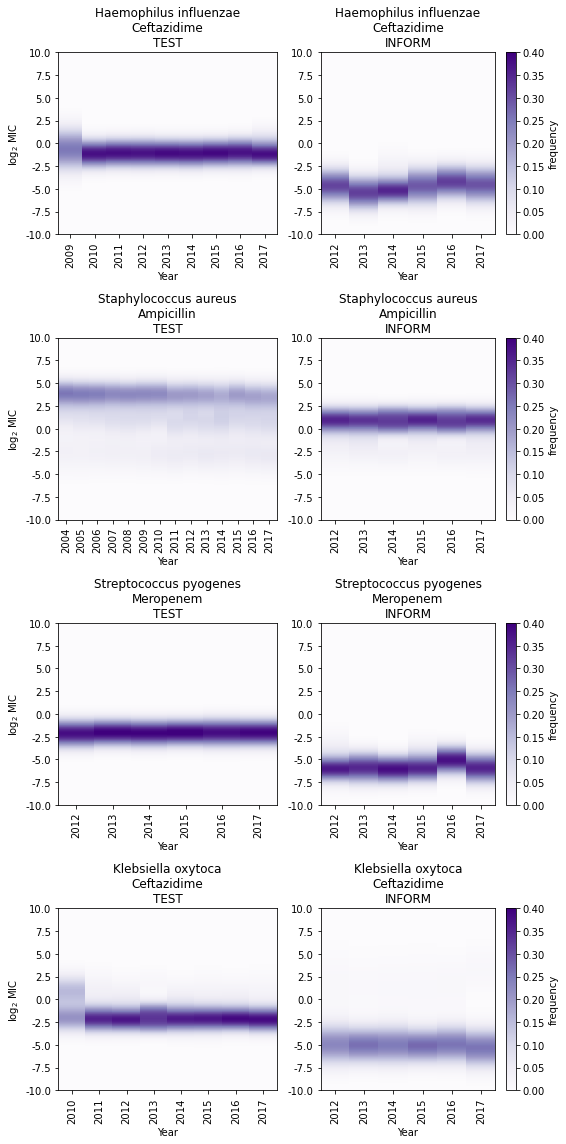

In [41]:
def plotMD(ZT, ZI, pYT, pYI,ax1,ax2,titleT,titleI):
    ZT=np.array(ZT)
    ZI=np.array(ZI)
    cmap=plt.cm.get_cmap('Purples')
    #HEATMAP
    npYT=np.array(pYT+[2020])
    npYI=np.array(pYI+[2020])
    N=1000
    gmm_x=np.linspace(-10,10,N)
    X, Y=np.meshgrid(npYT, gmm_x)
    HT=ax1.pcolormesh(X,Y,np.transpose(ZT), edgecolors='face', cmap=cmap, vmax=0.4, vmin=0)
    X, Y=np.meshgrid(npYI, gmm_x)
    HI=ax2.pcolormesh(X,Y,np.transpose(ZI), edgecolors='face', cmap=cmap, vmax=0.4, vmin=0)
    cbar=fig.colorbar(HI, ax=ax2)
    cbar.ax.set_yticklabels(cbar.ax.get_yticks())
    cbar.ax.set_ylabel('frequency')
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax1.set_ylabel('log$_2$ MIC')
    ax1.set_xlabel('Year')
    ax1.set_xticks(npYT+0.5)
    ax1.set_yticklabels(ax1.get_yticks())
    ax1.set_xticklabels(ax1.get_xticks(), rotation=90)
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax1.set_title(titleT)     
    ax1.set_xlim([min(pYT), max(pYT)+1])
    ax1.set_ylim([-10,10])
    ax2.set_xlabel('Year')
    ax2.set_xticks(npYI+0.5)
    ax2.set_yticklabels(ax2.get_yticks())
    ax2.set_xticklabels(ax2.get_xticks(), rotation=90)
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax2.set_title(titleI)     
    ax2.set_xlim([min(pYI), max(pYI)+1])
    ax2.set_ylim([-10,10])
    return ax1,ax2

L=[['Haemophilus influenzae','Ceftazidime'],
   ['Staphylococcus aureus','Ampicillin'],
   ['Streptococcus pyogenes','Meropenem'],
   ['Klebsiella oxytoca','Ceftazidime']]
fig, axs=plt.subplots(4,2,figsize=(8,16))
for i,key in enumerate(L):
    sp=key[0]
    dr=key[1]
    ZT, pYT=read_micdist(sp,dr,'_test')
    ax1=axs[i,0]
    titleT=sp+'\n'+dr+'\n'+'TEST'
    ZI, pYI=read_micdist(sp,dr,'_inform')
    ax2=axs[i,1]
    titleI=sp+'\n'+dr+'\n'+'INFORM'
    ax1,ax2=plotMD(ZT, ZI, pYT, pYI,ax1,ax2,titleT,titleI)
fig.tight_layout()

# SUPPLEMENTARY FIGURE 12

/home/pcatalan/MEGA/notas/mic_paper/functions.py:406: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  H=ax.pcolormesh(X,Y,np.transpose(Z), edgecolors='face', cmap=cmap)
/home/pcatalan/MEGA/notas/mic_paper/functions.py:408: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticks())
/home/pcatalan/MEGA/notas/mic_paper/functions.py:414: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks())


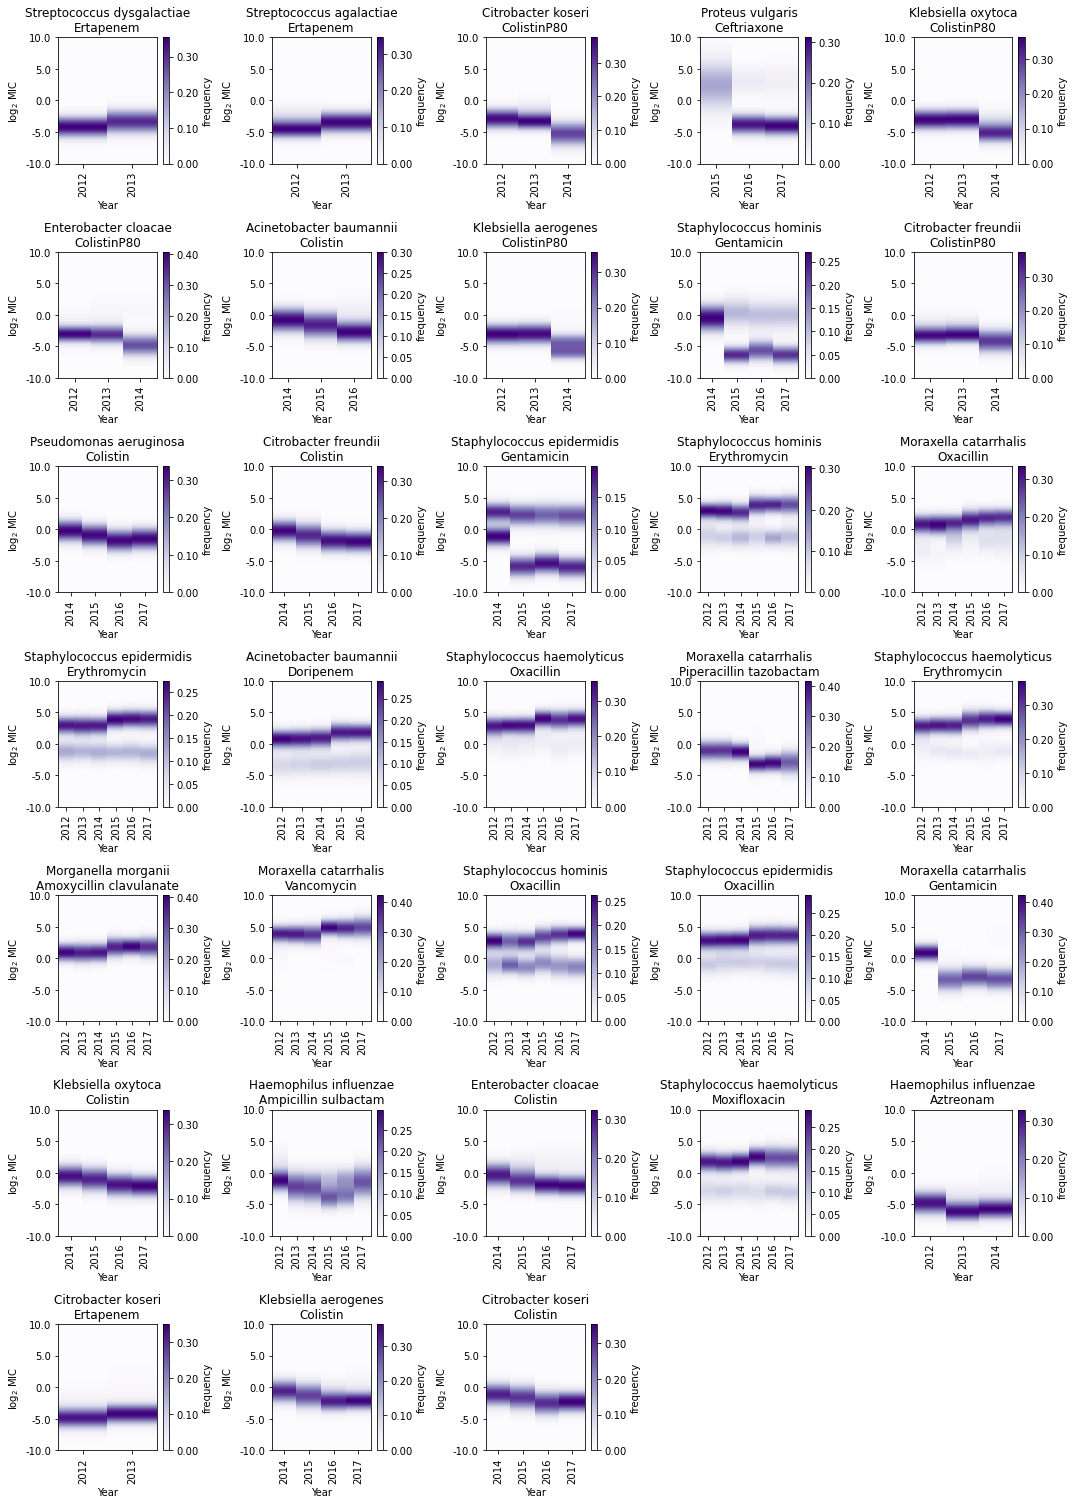

In [42]:
newDF=pd.read_csv('results/correlations/bad_correlations.csv')
fig=plt.figure(figsize=(15,21))
i=1
for index,row in newDF.iterrows():
    sp=row['Species']
    dr=row['Antibiotic']
    Z,pY=read_micdist(sp,dr)
    ax=fig.add_subplot(7,5,i)
    i=i+1
    title=sp+'\n'+dr
    H=plot_micdist(np.array(Z),pY,fig,ax,title)
fig.tight_layout()

# SUPPLEMENTARY FIGURE 13

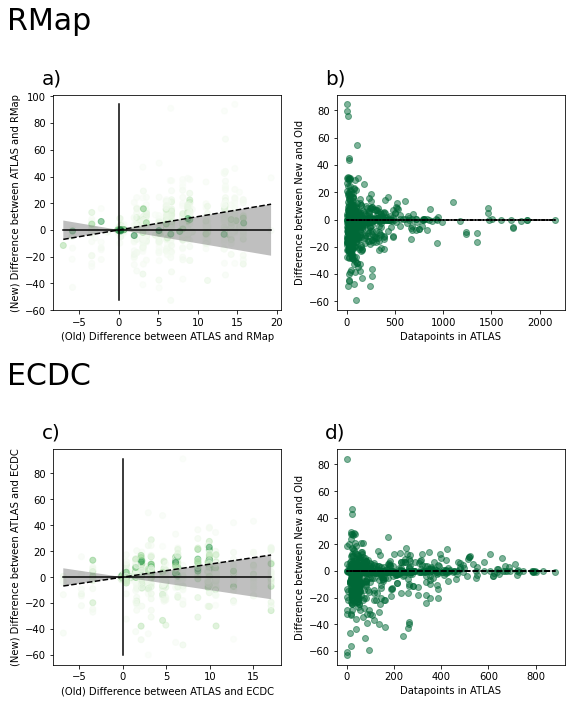

In [43]:
# RESISTANCEMAP
# COMPARE DIFFERENCE IN PREVIOUS FILE WITH DIFFERENCE IN NEW ONE
NewDF=pd.read_excel('data/atlas_vs_resistancemap_moving_breakpoints.xls')
OldDF=pd.read_excel('data/atlas_vs_resistancemap.xls')

X=[]
Y=[]
N=[]
for index,row in NewDF.iterrows():
    sp=row['Species']
    dr=row['Antibiotic']
    y=row['Year']
    DN=row['Diff']
    O=OldDF[(OldDF.Species==sp) & (OldDF.Antibiotic==dr) & (OldDF.Year==y)]
    DO=O['Diff'].mean()
    X.append(DO)
    Y.append(DN)
    N.append(row['N'])

X=np.array(X)
Y=np.array(Y)

#FIGURE
color1='#006837'
color2='#B40E26'
fig=plt.figure(figsize=(8,10))
#SCATTERPLOT
ax=fig.add_subplot(2,2,1)
cmap=matplotlib.cm.get_cmap('Greens')
#ax.plot(X,Y,'o',color='white', markeredgecolor='k', alpha=0.1)
ax.scatter(X,Y,marker='o', c=N, alpha=0.5, cmap=cmap, vmin=0, vmax=max(N))
ax.set_xlabel('(Old) Difference between ATLAS and RMap')
ax.set_ylabel('(New) Difference between ATLAS and RMap')
xp=np.linspace(X.min(),X.max())
ax.plot(xp,xp,'--k')
ax.fill_between(xp,xp,-xp, facecolor='grey', alpha=0.5)
ax.plot(xp,0*xp,'-k')
yp=np.linspace(Y.min(),Y.max())
ax.plot(0*yp,yp,'-k')
ax.text(-0.05,1.05,'a)',fontsize=20,transform=ax.transAxes)
ax.text(-0.2,1.3, 'RMap',fontsize=30,transform=ax.transAxes)
#DIFF VERSUS N
ax=fig.add_subplot(2,2,2)
ax.plot(N,Y-X,'o', color=color1, alpha=0.5)
ax.plot(N,[0 for _ in N],'--k')
ax.set_xlabel('Datapoints in ATLAS')
ax.set_ylabel('Difference between New and Old')
ax.text(-0.05,1.05,'b)',fontsize=20,transform=ax.transAxes)

# ECDC
# COMPARE DIFFERENCE IN PREVIOUS FILE WITH DIFFERENCE IN NEW ONE
NewDF=pd.read_excel('data/atlas_vs_ecdc_moving_breakpoints.xls')
OldDF=pd.read_excel('data/atlas_vs_ecdc.xls')

X=[]
Y=[]
N=[]
for index,row in NewDF.iterrows():
    sp=row['Species']
    dr=row['Antibiotic']
    y=row['Year']
    DN=row['Diff']
    O=OldDF[(OldDF.Species==sp) & (OldDF.Antibiotic==dr) & (OldDF.Year==y)]
    DO=O['Diff'].mean()
    X.append(DO)
    Y.append(DN)
    N.append(row['N'])

X=np.array(X)
Y=np.array(Y)

#SCATTERPLOT
ax=fig.add_subplot(2,2,3)
cmap=matplotlib.cm.get_cmap('Greens')
#ax.plot(X,Y,'o',color='white', markeredgecolor='k', alpha=0.1)
ax.scatter(X,Y,marker='o', c=N, alpha=0.5, cmap=cmap, vmin=0, vmax=max(N))
ax.set_xlabel('(Old) Difference between ATLAS and ECDC')
ax.set_ylabel('(New) Difference between ATLAS and ECDC')
xp=np.linspace(X.min(),X.max())
ax.plot(xp,xp,'--k')
ax.fill_between(xp,xp,-xp, facecolor='grey', alpha=0.5)
ax.plot(xp,0*xp,'-k')
yp=np.linspace(Y.min(),Y.max())
ax.plot(0*yp,yp,'-k')
ax.text(-0.05,1.05,'c)',fontsize=20,transform=ax.transAxes)
ax.text(-0.2,1.3, 'ECDC',fontsize=30,transform=ax.transAxes)
#DIFF VERSUS N
ax=fig.add_subplot(2,2,4)
ax.plot(N,Y-X,'o', color=color1, alpha=0.5)
ax.plot(N,[0 for _ in N],'--k')
ax.set_xlabel('Datapoints in ATLAS')
ax.set_ylabel('Difference between New and Old')
ax.text(-0.05,1.05,'d)',fontsize=20,transform=ax.transAxes)

fig.tight_layout()

# SUPPLEMENTARY FIGURE 14

/home/pcatalan/MEGA/notas/mic_paper/functions.py:368: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([str(vmin)+' or less', '0.0', str(vmax)+' or more'])


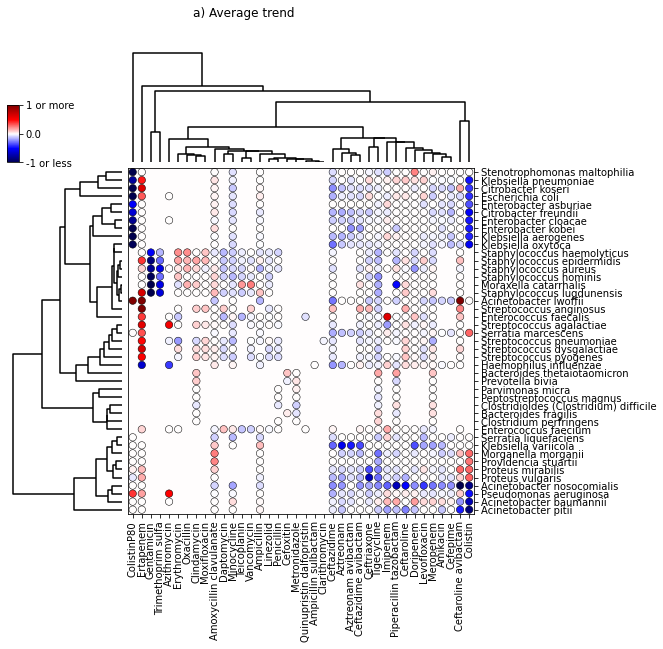

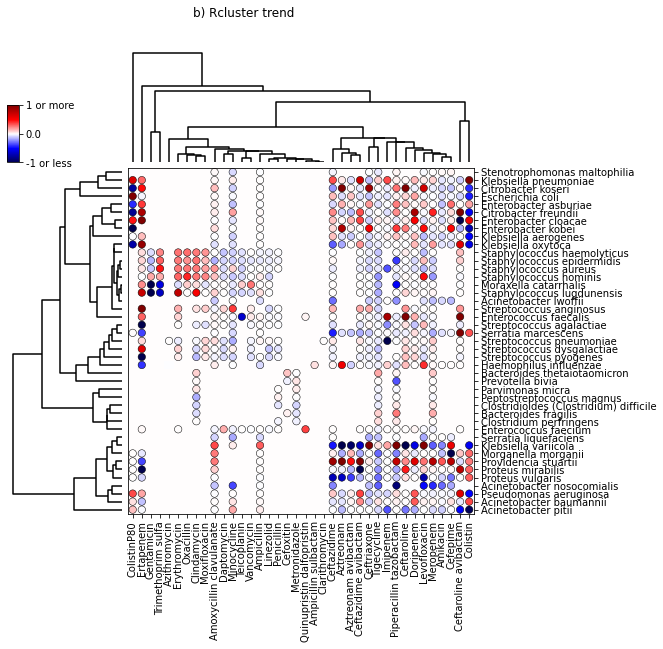

In [44]:
DFdata=pd.read_csv('data/mic_change_global.csv')
X=np.array(get_key(DFdata, 'Species'))
Y=np.array(get_key(DFdata, 'Antibiotic'))
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['MIC change']
SC={}
for index, row in DFdata.iterrows():        
    sp=row['Species']
    c1=row['Antibiotic']
    key=sp+'+'+c1
    SC[key]=row['MIC change']
#WE WILL USE THE SAME CLUSTERING AS IN FIG2B
Z,Y1,Y2=clustermap_clustering(X,Y,SC)
#NOW READ TRENDS FOR EUROPE
DFdata=pd.read_csv('data/mic_change_europe.csv')
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['MIC change']
fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zp)
fig.suptitle('a) Average trend');
#NOW READ RTRENDS FOR EUROPE
DFdata=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP_europe.csv')
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['Rtrend']
fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zp)
fig.suptitle('b) Rcluster trend');

# SUPPLEMENTARY FIGURE 15

## SUPPLEMENTARY FIGURE 15A

/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/func

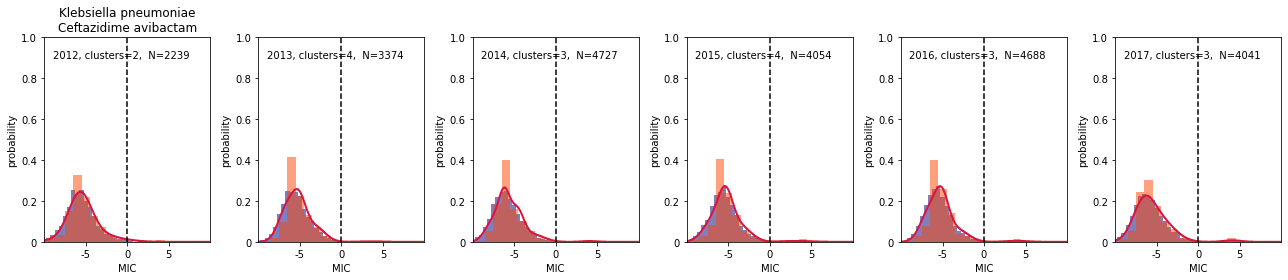

In [2]:
sp='Klebsiella pneumoniae'
dr='Ceftazidime avibactam'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
oH=list(oH)
DFy=pd.read_csv('results/Rcluster/'+sp+'_'+dr+'_clusters.csv')
clusters=list(DFy.Clusters)
DFy=pd.read_csv('data/average_mic_per_year_complete.csv')
DFy=DFy[(DFy.Species==sp) & (DFy.Antibiotic==dr)]
N=list(DFy['Number of cases'])
fig=plot_michistograms(pY,oH,sH,gM,title,clusters,N)

## SUPPLEMENTARY FIGURE 15B

/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])


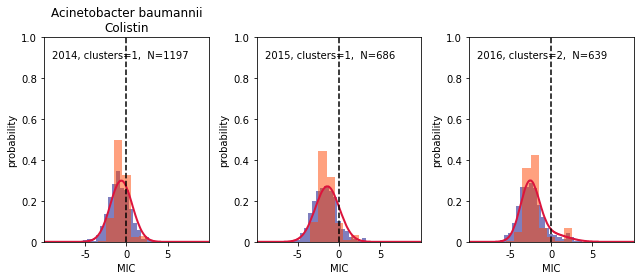

In [3]:
sp='Acinetobacter baumannii'
dr='Colistin'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
oH=list(oH)
DFy=pd.read_csv('results/Rcluster/'+sp+'_'+dr+'_clusters.csv')
clusters=list(DFy.Clusters)
DFy=pd.read_csv('data/average_mic_per_year_complete.csv')
DFy=DFy[(DFy.Species==sp) & (DFy.Antibiotic==dr)]
N=list(DFy['Number of cases'])
fig=plot_michistograms(pY,oH,sH,gM,title,clusters,N)

# SUPPLEMENTARY FIGURE 16

## SUPPLEMENTARY FIGURE 16A

/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/func

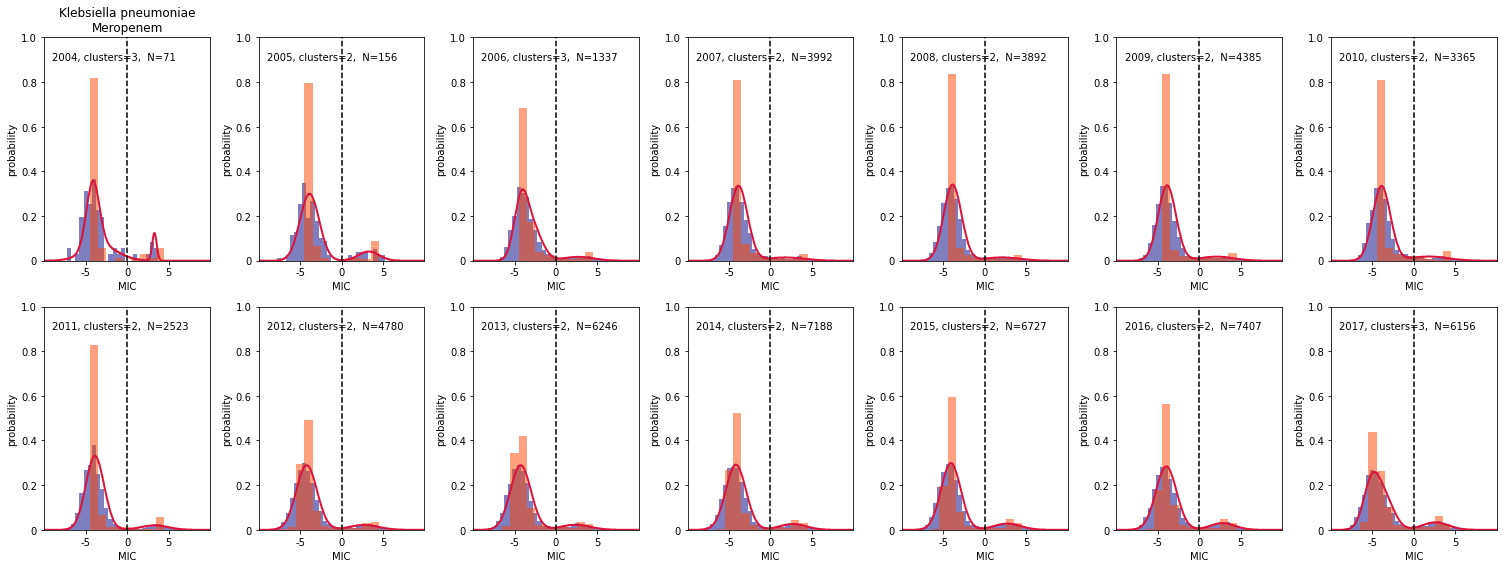

In [4]:
sp='Klebsiella pneumoniae'
dr='Meropenem'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
oH=list(oH)
DFy=pd.read_csv('results/Rcluster/'+sp+'_'+dr+'_clusters.csv')
clusters=list(DFy.Clusters)
DFy=pd.read_csv('data/average_mic_per_year_complete.csv')
DFy=DFy[(DFy.Species==sp) & (DFy.Antibiotic==dr)]
N=list(DFy['Number of cases'])
fig=plot_michistograms(pY,oH,sH,gM,title,clusters,N)

## SUPPLEMENTARY FIGURE 16B

/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/func

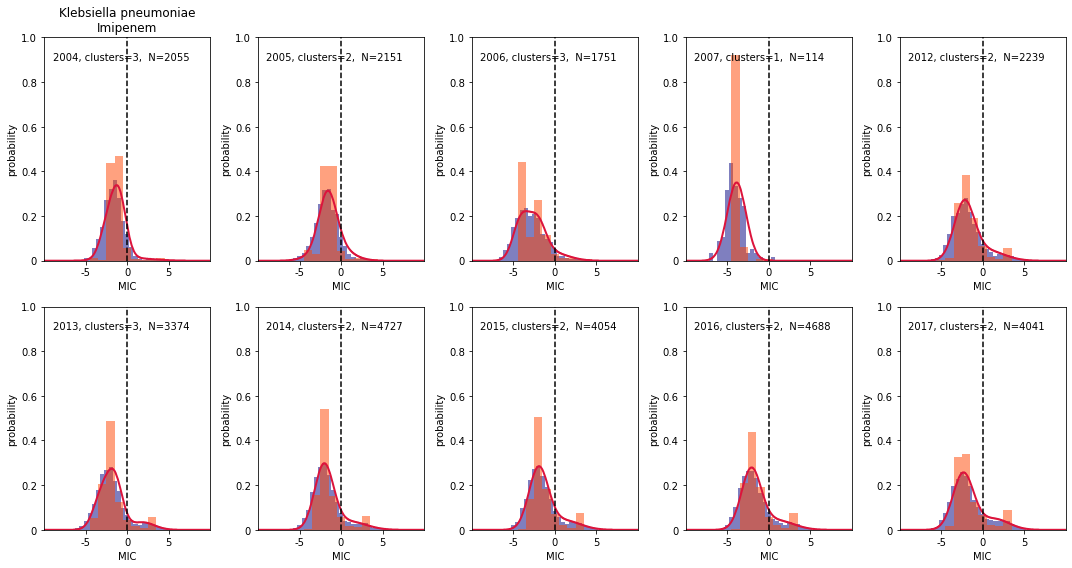

In [5]:
sp='Klebsiella pneumoniae'
dr='Imipenem'
title=sp+'\n'+dr
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
oH=list(oH)
DFy=pd.read_csv('results/Rcluster/'+sp+'_'+dr+'_clusters.csv')
clusters=list(DFy.Clusters)
DFy=pd.read_csv('data/average_mic_per_year_complete.csv')
DFy=DFy[(DFy.Species==sp) & (DFy.Antibiotic==dr)]
N=list(DFy['Number of cases'])
fig=plot_michistograms(pY,oH,sH,gM,title,clusters,N)

## SUPPLEMENTARY FIGURE 16C

/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])


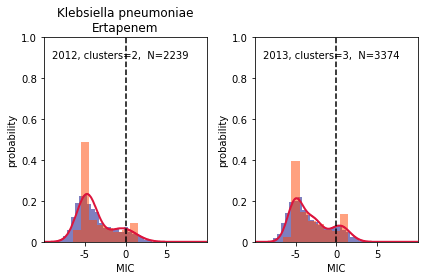

In [6]:
sp='Klebsiella pneumoniae'
dr='Ertapenem'
title=sp+'\n'+dr
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
oH=list(oH)
DFy=pd.read_csv('results/Rcluster/'+sp+'_'+dr+'_clusters.csv')
clusters=list(DFy.Clusters)
DFy=pd.read_csv('data/average_mic_per_year_complete.csv')
DFy=DFy[(DFy.Species==sp) & (DFy.Antibiotic==dr)]
N=list(DFy['Number of cases'])
fig=plot_michistograms(pY,oH,sH,gM,title,clusters,N)

## SUPPLEMENTARY FIGURE 16D

/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/func

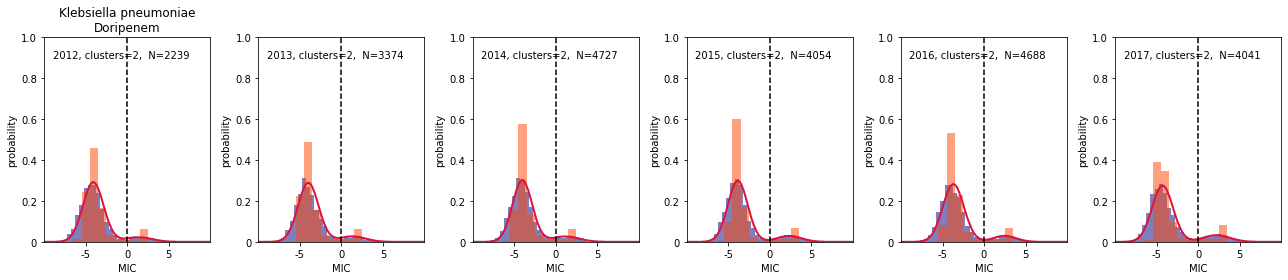

In [7]:
sp='Klebsiella pneumoniae'
dr='Doripenem'
title=sp+'\n'+dr
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
oH=list(oH)
DFy=pd.read_csv('results/Rcluster/'+sp+'_'+dr+'_clusters.csv')
clusters=list(DFy.Clusters)
DFy=pd.read_csv('data/average_mic_per_year_complete.csv')
DFy=DFy[(DFy.Species==sp) & (DFy.Antibiotic==dr)]
N=list(DFy['Number of cases'])
fig=plot_michistograms(pY,oH,sH,gM,title,clusters,N)

# SUPPLEMENTARY FIGURE 17

## SUPPLEMENTARY FIGURE 17A

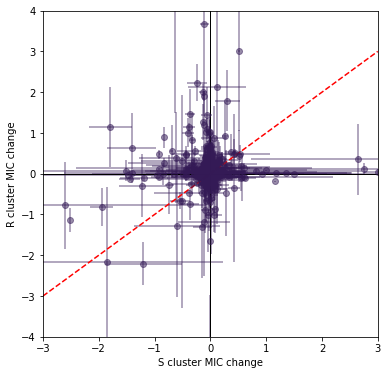

In [17]:
DF=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
pL=get_key(DF, 'Species')
drugs=get_key(DF, 'Antibiotic')

x=DF['Strend']
xerr=DF['Strenderror']
y=DF['Rtrend']
yerr=DF['Rtrenderror']

color1='#341a56'
color2='red'
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
ax.errorbar(x,y,fmt='o',xerr=xerr,yerr=yerr,color=color1,alpha=0.5)
minX=-3
maxX=3
xp=np.linspace(minX, maxX,100)
minY=-4
maxY=4
yp=np.linspace(minY, maxY,100)
ax.plot(xp,0*xp,'-k', lw=1)
ax.plot(0*yp,yp,'-k', lw=1)
ax.plot(xp,xp,'--', color=color2)
ax.set_xlabel('S cluster MIC change')
ax.set_ylabel('R cluster MIC change')
ax.set_xlim([minX,maxX])
ax.set_ylim([minY,maxY]);

## SUPPLEMENTARY FIGURE 17B

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


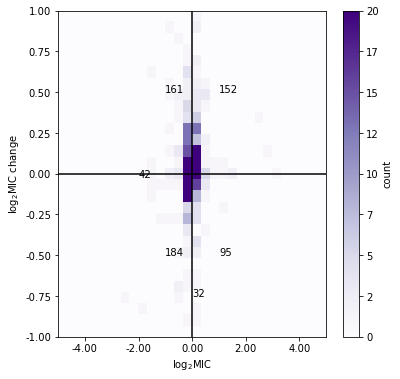

In [88]:
DF=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
pL=get_key(DF, 'Species')
drugs=get_key(DF, 'Antibiotic')

x=DF['Strend']
y=DF['Rtrend']

#FIRST QUADRANT
DF1=DF[(DF.Strend>0) & (DF.Rtrend>0)]
#SECOND QUDRANT
DF2=DF[(DF.Strend<0) & (DF.Rtrend>0)]
#THIRD QUADRANT
DF3=DF[(DF.Strend<0) & (DF.Rtrend<0)]
#FOURTH QUADRANT
DF4=DF[(DF.Strend>0) & (DF.Rtrend<0)]
#HORIZONTAL LINE
DF5=DF[DF.Rtrend==0]
#VERTICAL LINE
DF6=DF[DF.Strend==0]

minx=np.floor(x.min())
miny=np.floor(y.min())
maxx=np.ceil(x.max())
maxy=np.ceil(y.max())
miny=-1
maxy=1
minx=-5
maxx=5
xedges=np.linspace(minx,maxx,31)
yedges=np.linspace(miny,maxy,30)

H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
I=ax.imshow(H, aspect='auto',interpolation='nearest', origin='lower', 
          cmap='Purples', vmin=0, vmax=20,
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar=plt.colorbar(I)#, ax=ax)
cbar.ax.set_yticklabels(cbar.ax.get_yticks())
cbar.ax.set_ylabel('count')
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xlabel('log$_2$MIC')
ax.set_ylabel('log$_2$MIC change')
ax.set_yticklabels(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.plot(xedges,[0 for z in xedges],'k')
ax.plot([0 for z in yedges],yedges,'k')
ax.text(1.00,0.5,str(len(DF1)))
ax.text(-1.00,0.5,str(len(DF2)))
ax.text(-1.00,-0.5,str(len(DF3)))
ax.text(1.00,-0.5,str(len(DF4)))
ax.text(-2.00,-0.02,str(len(DF5)))
ax.text(0.00,-0.75,str(len(DF6)));

# SUPPLEMENTARY FIGURE 18

## SUPPLEMENTARY FIGURE 18A

/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/func

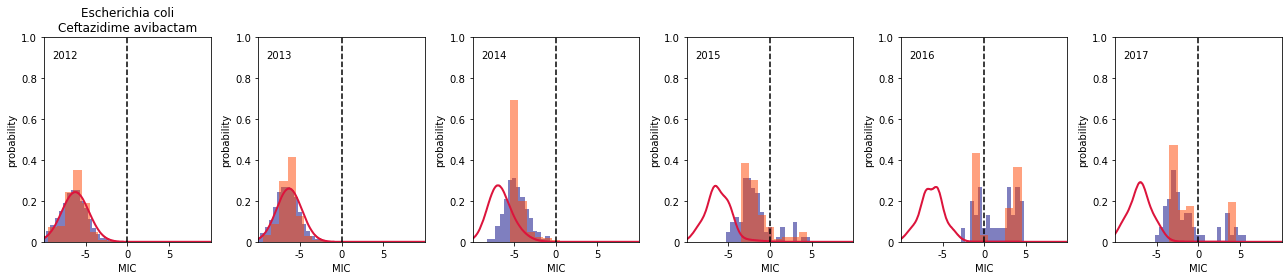

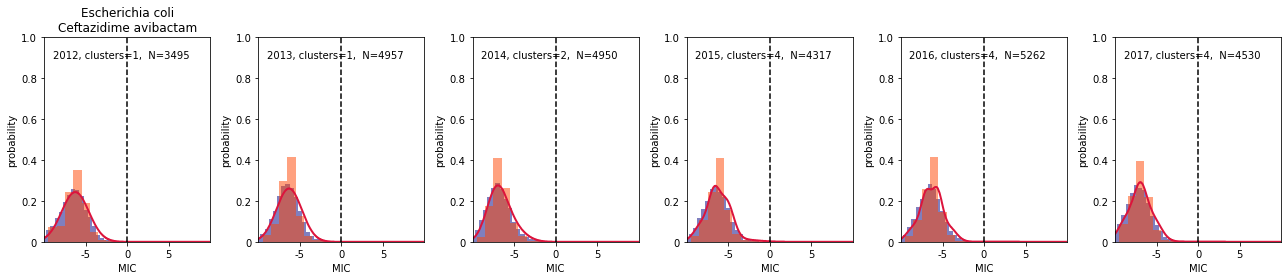

In [5]:
sp='Escherichia coli'
dr='Ceftazidime avibactam'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist_Rcluster(sp,dr)
fig=plot_michistograms(pY,list(oH),sH,gM,title)

gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
oH=list(oH)
DFy=pd.read_csv('results/Rcluster/'+sp+'_'+dr+'_clusters.csv')
clusters=list(DFy.Clusters)
DFy=pd.read_csv('data/average_mic_per_year_complete.csv')
DFy=DFy[(DFy.Species==sp) & (DFy.Antibiotic==dr)]
N=list(DFy['Number of cases'])
fig=plot_michistograms(pY,oH,sH,gM,title,clusters,N)

## SUPPLEMENTARY FIGURE 18B

/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/functions.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
/home/pcatalan/MEGA/notas/mic_paper/func

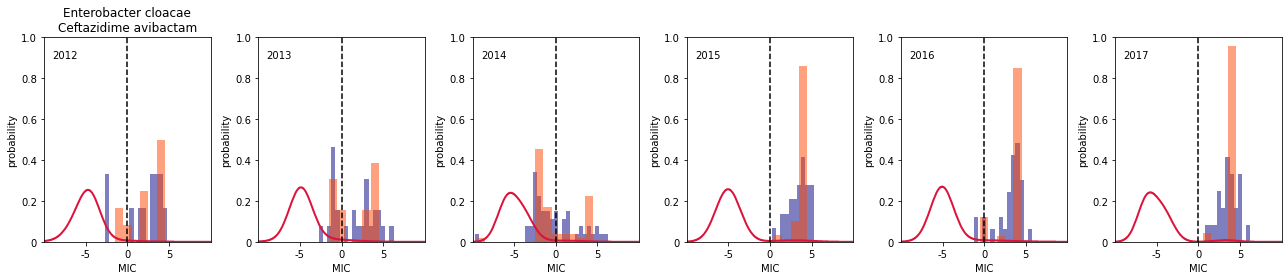

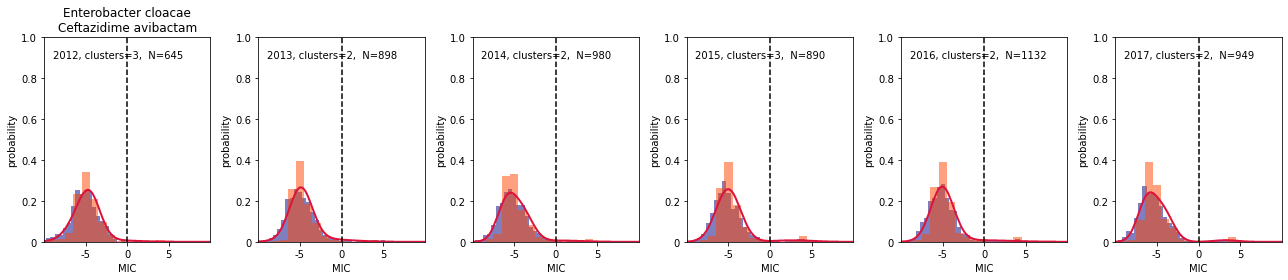

In [6]:
sp='Enterobacter cloacae'
dr='Ceftazidime avibactam'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist_Rcluster(sp,dr)
fig=plot_michistograms(pY,list(oH),sH,gM,title)
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
oH=list(oH)
DFy=pd.read_csv('results/Rcluster/'+sp+'_'+dr+'_clusters.csv')
clusters=list(DFy.Clusters)
DFy=pd.read_csv('data/average_mic_per_year_complete.csv')
DFy=DFy[(DFy.Species==sp) & (DFy.Antibiotic==dr)]
N=list(DFy['Number of cases'])
fig=plot_michistograms(pY,oH,sH,gM,title,clusters,N)

# SUPPLEMENTARY FIGURE 19

/home/pcatalan/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/pcatalan/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


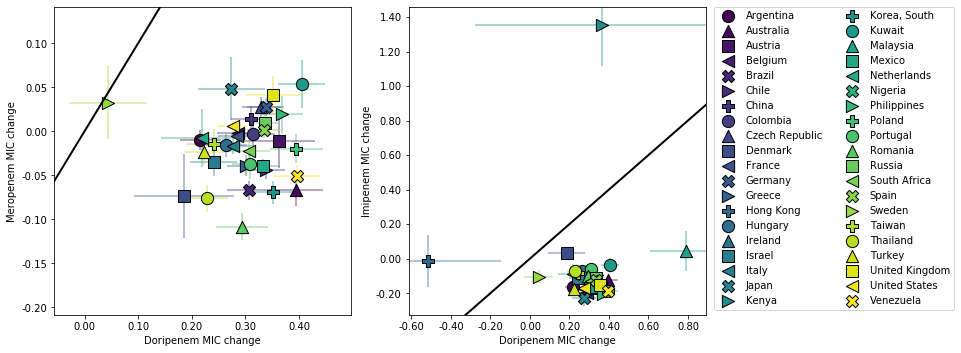

In [19]:
sp='Pseudomonas aeruginosa'
dr1='Doripenem'
dr2='Meropenem'
dr3='Imipenem'
RDori=pd.read_csv('results/Rcluster/'+sp+'_'+dr1+'_Rcluster.csv')
RMero=pd.read_csv('results/Rcluster/'+sp+'_'+dr2+'_Rcluster.csv')
RImi=pd.read_csv('results/Rcluster/'+sp+'_'+dr3+'_Rcluster.csv')
pC1=get_key(RDori,'Country')
pC2=get_key(RMero,'Country')
pC3=get_key(RImi,'Country')
pC=[]
for country in pC1:
    if country in pC2 and country in pC3:
        pC.append(country)
pC=sorted(pC)
vals=np.linspace(0,1,len(pC))#each class will have one color
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
#SYMBOLS AND COLORS FOR EACH COUNTRY
LS=['o', '^', 's', '<', 'X', '>', 'P']
LM={}
LC={}
LA={}
for count, dr in enumerate(pC):
    LM[dr]=LS[count%len(LS)]
    LC[dr]=cmap(count/len(pC))

fig=plt.figure(figsize=(10,5))
handles=[]
labels=[]

#DORI VS MERO
L=[]
ax=fig.add_subplot(1,2,1)
maxx=-1
maxy=-1
minx=1
miny=1
for country in pC:
    R1=RDori[RDori.Country==country]
    R2=RMero[RMero.Country==country]
    if R1.empty or R2.empty: continue
    #DORI TREND
    x1=R1['Year'].tolist()
    y1=R1['MIC'].tolist()
    s1,i1,r1,p1,std1=stats.linregress(x1,y1)
    if True:#p1<0.05:
        x=s1
        xerr=std1
    else:
        x=0.0
        xerr=0.0
    #MERO TREND
    x2=R2['Year'].tolist()
    y2=R2['MIC'].tolist()
    s2,i2,r2,p2,std2=stats.linregress(x2,y2)
    if True:#p2<0.05:
        y=s2
        yerr=std2
    else:
        y=0.0
        yerr=0.0
    maxx=max(x,maxx)
    minx=min(x,minx)
    maxy=max(y,maxy)
    miny=min(y,miny)
    ax.scatter(x,y,edgecolors='black',color=LC[country],marker=LM[country], 
               s=150, zorder=2, label=country)
    ax.errorbar(x,y,fmt='o',color=LC[country],markersize=0, 
                xerr=xerr,yerr=yerr, zorder=1, alpha=0.5)
#LABELS
ax.set_xlabel('Doripenem MIC change')
ax.set_ylabel('Meropenem MIC change')
ax.set_yticklabels(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
yp=np.linspace(-40,40,100)
xp=[0 for z in yp]
ax.plot(yp,yp, '-k', linewidth=2)
ax.set_ylim([miny-0.1,maxy+0.1])
ax.set_xlim([minx-0.1,maxx+0.1])
handles1, labels1 = ax.get_legend_handles_labels()
handles+=handles1
labels+=labels1

#DORI VS IMI
ax=fig.add_subplot(1,2,2)
maxx=-1
maxy=-1
minx=1
miny=1
for country in pC:
    R1=RDori[RDori.Country==country]
    R2=RImi[RImi.Country==country]
    if R1.empty or R2.empty: continue
    #DORI TREND
    Y1=get_key(R1,'Year')
    if len(Y1)<2: continue
    x1=R1['Year'].tolist()
    y1=R1['MIC'].tolist()
    s1,i1,r1,p1,std1=stats.linregress(x1,y1)
    if True:#p1<0.05:
        x=s1
        xerr=std1
    else:
        x=0.0
        xerr=0.0
    #IMI TREND
    Y2=get_key(R2,'Year')
    if len(Y2)<2: continue
    x2=R2['Year'].tolist()
    y2=R2['MIC'].tolist()
    s2,i2,r2,p2,std2=stats.linregress(x2,y2)
    if True:#p2<0.05:
        y=s2
        yerr=std2
    else:
        y=0.0
        yerr=0.0
    maxx=max(x,maxx)
    minx=min(x,minx)
    maxy=max(y,maxy)
    miny=min(y,miny)
        # print(sp,country,len(R1),len(R2),s1,p1,s2,p2)
        # L.append([x,y,country])
    ax.scatter(x,y,edgecolors='black',color=LC[country],marker=LM[country], 
               s=150, zorder=2, label=country)
    ax.errorbar(x,y,fmt='o',color=LC[country],markersize=0, 
                xerr=xerr,yerr=yerr, zorder=1, alpha=0.5)
#LABELS
ax.set_xlabel('Doripenem MIC change')
ax.set_ylabel('Imipenem MIC change')
ax.set_yticklabels(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
yp=np.linspace(-40,40,100)
xp=[0 for z in yp]
ax.plot(yp,yp, '-k', linewidth=2)
ax.set_ylim([miny-0.1,maxy+0.1])
ax.set_xlim([minx-0.1,maxx+0.1])
handles1, labels1 = ax.get_legend_handles_labels()
handles+=handles1
labels+=labels1
#ORGANIZE LABELS
H=[0 for z in pC]
L=[z for z in pC]
for h,l in zip(handles,labels):
    index1=L.index(l)
    H[index1]=h
fig.legend(H, L, loc='lower left', bbox_to_anchor=[1.01, 0.0, 0.3, 0.3],
          bbox_transform=ax.transAxes, ncol=2)
fig.tight_layout()

# SUPPLEMENTARY FIGURE 20

# SUPPLEMENTARY FIGURE 20A, B and C

/home/pcatalan/MEGA/notas/mic_paper/functions.py:368: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([str(vmin)+' or less', '0.0', str(vmax)+' or more'])
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator


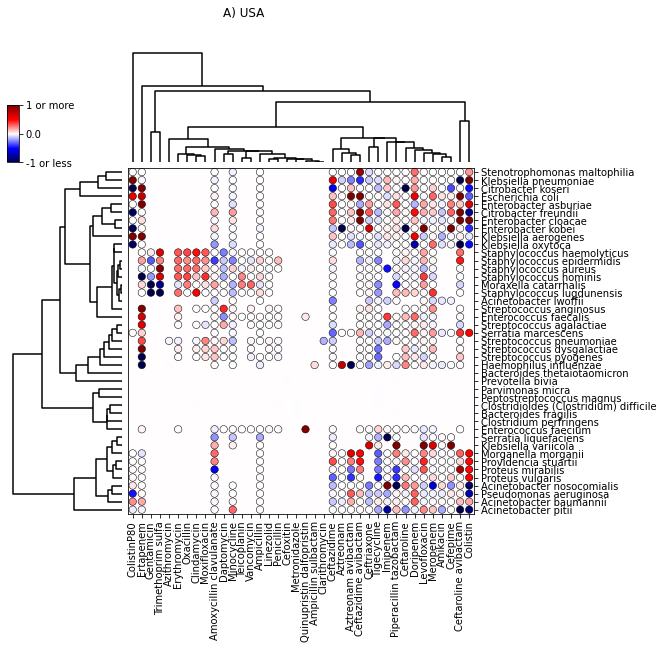

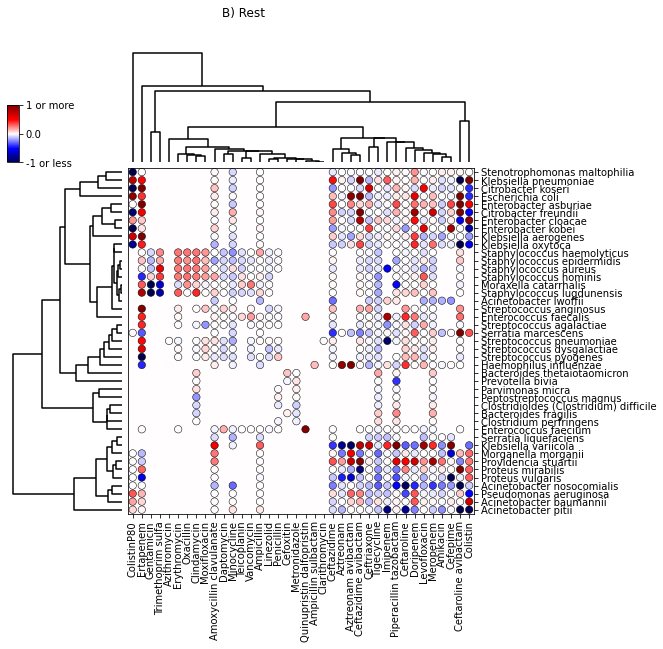

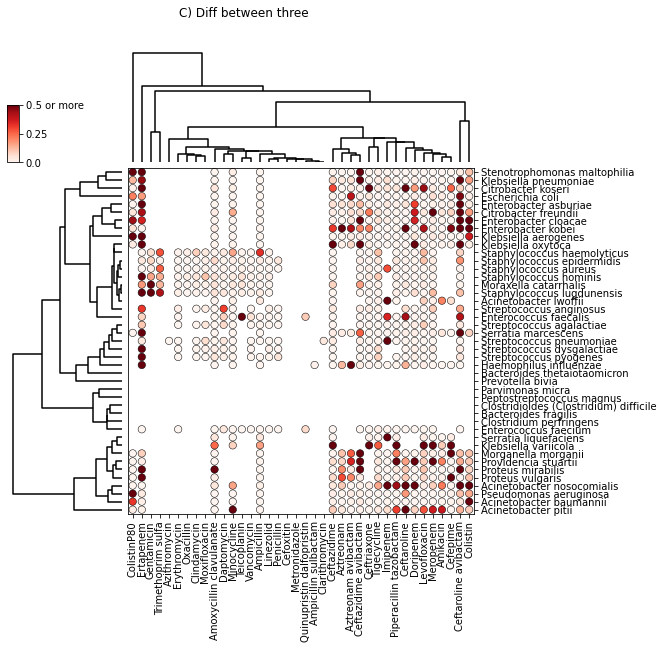

In [52]:
DFdata=pd.read_csv('data/mic_change_global.csv')
X=np.array(get_key(DFdata, 'Species'))
Y=np.array(get_key(DFdata, 'Antibiotic'))
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['MIC change']
SC={}
for index, row in DFdata.iterrows():        
    sp=row['Species']
    c1=row['Antibiotic']
    key=sp+'+'+c1
    SC[key]=row['MIC change']
#WE WILL USE THE SAME CLUSTERING AS IN FIG2B
Z,Y1,Y2=clustermap_clustering(X,Y,SC)
#NOW READ TRENDS FOR EUROPE
DFusa=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP_usa.csv')
DFeurope=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP_europe.csv')
DFrest=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP_rest.csv')
xp=DFusa['Species']
yp=DFusa['Antibiotic']
zusa=DFusa['Rtrend']
zeurope=DFeurope['Rtrend']
zrest=DFrest['Rtrend']
fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zusa)
fig.suptitle('A) USA');
fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zeurope)
#fig.suptitle('b) Europe');
#fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zrest)
fig.suptitle('B) Rest');
#COMPARE THE THREE
ZD1=zusa-zeurope
ZD2=zusa-zrest
ZD3=zrest-zeurope
ZD4=ZD1**2+ZD2**2+ZD3**2
import scipy.cluster.hierarchy as sch
fig = plt.figure(figsize=(8,8))
# for the letf dendrogram
# Add an axes at position rect [left, bottom, width, height]
ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
Z1 = sch.dendrogram(Y1, orientation='left',link_color_func=lambda k: 'k')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis('off')

# top side dendogram
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
Z2 = sch.dendrogram(Y2, link_color_func=lambda k: 'k')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axis('off')

# main heat-map
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
#ADAPT XP AND YP
newX=list(X[idx1])
newY=list(Y[idx2])
xp=[newX.index(z) for z in xp]
yp=[newY.index(z) for z in yp]
Z = Z[idx1, :]
Z = Z[:, idx2]
# the actual heat-map    
cmap=matplotlib.cm.get_cmap('Reds')
im = axmatrix.imshow(0*Z, aspect='auto', cmap='binary', vmin=0, vmax=1)
size=55
P=axmatrix.scatter(yp, xp, c=ZD4, s=size, cmap=cmap, vmin=0, vmax=0.5, edgecolors='k', linewidths=0.5)

# xticks to the right (x-axis)
axmatrix.set_xticks(range(len(Y)))
axmatrix.set_xticklabels(Y[idx2], minor=False)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()
plt.xticks(rotation=90)

# xticks to the right (y-axis)
axmatrix.set_yticks(range(len(X)))
axmatrix.set_yticklabels(X[idx1], minor=False)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()

# to add the color bar
axcolor=fig.add_axes([0.09, 0.71, 0.02, 0.1])
cbar=fig.colorbar(P,cax=axcolor)
cbar.ax.set_yticklabels(['0.0', '0.25', '0.5 or more'])

#fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,ZD4)
fig.suptitle('C) Diff between three');

## SUPPLEMENTARY FIGURE 20D

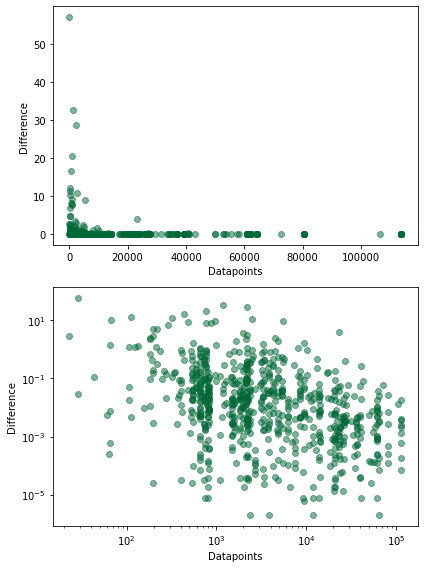

In [63]:
#DIFFERENCES BETWEEN NUMBER OF DATAPOINTS
DDF=pd.read_csv('results/Rcluster/resistant_cluster_trends_datapoints.csv')
Datapoints=DDF['Datapoints']

fig=plt.figure(figsize=(6,8))
ax=fig.add_subplot(2,1,1)
ax.plot(Datapoints,ZD4,'o',color=color1,alpha=0.5)
ax.set_xlabel('Datapoints')
ax.set_ylabel('Difference')
ax=fig.add_subplot(2,1,2)
ax.plot(Datapoints,ZD4,'o',color=color1,alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Datapoints')
ax.set_ylabel('Difference')
fig.tight_layout()

# SUPPLEMENTARY FIGURE 21

Staphylococcus aureus Daptomycin -0.1672862841984849 -0.06284810291839786 [0.26633598] Kenya
Staphylococcus aureus Daptomycin -0.1672862841984849 -0.06284810291839786 [-0.42020057] Nigeria
Staphylococcus aureus Azithromycin -0.016779260264572618 -0.004296099117944851 [-0.79563039] Mexico


/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Staphylococcus aureus Erythromycin -0.006690252757409802 0.1274897447610199 [-1.64270094] Kenya
Streptococcus pneumoniae Ceftriaxone -0.013293605271474806 0.006136541632482661 [-0.11767348] Austria
Streptococcus pneumoniae Ceftriaxone -0.013293605271474806 0.006136541632482661 [0.4571874] China
Streptococcus pneumoniae Ceftriaxone -0.013293605271474806 0.006136541632482661 [-0.0752063] Denmark
Streptococcus pneumoniae Ceftriaxone -0.013293605271474806 0.006136541632482661 [-0.17645868] Finland
Streptococcus pneumoniae Ceftriaxone -0.013293605271474806 0.006136541632482661 [-0.0852125] France
Streptococcus pneumoniae Ceftriaxone -0.013293605271474806 0.006136541632482661 [-0.08924274] Hungary
Streptococcus pneumoniae Ceftriaxone -0.013293605271474806 0.006136541632482661 [0.45560675] India
Streptococcus pneumoniae Ceftriaxone -0.013293605271474806 0.006136541632482661 [-0.08797404] Israel
Streptococcus pneumoniae Ceftriaxone -0.013293605271474806 0.006136541632482661 [-0.34864193] Jorda

Escherichia coli Aztreonam -0.013197753049157 0.0033763049066871014 [-0.33487817] Brazil
Escherichia coli Aztreonam -0.013197753049157 0.0033763049066871014 [-2.55092857] Hong Kong
Escherichia coli Aztreonam -0.013197753049157 0.0033763049066871014 [-3.21275197] Kenya
Escherichia coli Aztreonam -0.013197753049157 0.0033763049066871014 [0.22789968] Kuwait
Escherichia coli Aztreonam -0.013197753049157 0.0033763049066871014 [-0.30524219] Portugal
Escherichia coli Aztreonam -0.013197753049157 0.0033763049066871014 [-0.21451954] Sweden
Escherichia coli Aztreonam -0.013197753049157 0.0033763049066871014 [-0.23904413] Turkey
Escherichia coli Aztreonam -0.013197753049157 0.0033763049066871014 [-0.18688118] United Kingdom
Escherichia coli Ceftaroline -0.004732955971922545 0.014058719089542933 [0.27073704] Belgium
Escherichia coli Ceftaroline -0.004732955971922545 0.014058719089542933 [-0.40158106] Brazil
Escherichia coli Ceftaroline -0.004732955971922545 0.014058719089542933 [0.14939829] France

Klebsiella pneumoniae Levofloxacin -0.006264986123076405 0.08814975004442185 [0.8080623] Bulgaria
Klebsiella pneumoniae Levofloxacin -0.006264986123076405 0.08814975004442185 [-3.96690197] El Salvador
Klebsiella pneumoniae Levofloxacin -0.006264986123076405 0.08814975004442185 [0.73059515] Honduras
Klebsiella pneumoniae Levofloxacin -0.006264986123076405 0.08814975004442185 [-0.17312966] Malaysia
Klebsiella pneumoniae Levofloxacin -0.006264986123076405 0.08814975004442185 [-1.6797376] Nigeria
Klebsiella pneumoniae Levofloxacin -0.006264986123076405 0.08814975004442185 [1.36326042] Slovak Republic
Klebsiella pneumoniae Levofloxacin -0.006264986123076405 0.08814975004442185 [0.79670467] Slovenia
Klebsiella pneumoniae Aztreonam -0.01526810249691387 0.00882288016462762 [0.19749589] Australia
Klebsiella pneumoniae Aztreonam -0.01526810249691387 0.00882288016462762 [0.32541888] Belgium
Klebsiella pneumoniae Aztreonam -0.01526810249691387 0.00882288016462762 [-0.26603271] Brazil
Klebsiella pn

Pseudomonas aeruginosa Amikacin -0.06009664402969814 -0.0011957823072367697 [-3.14305339] El Salvador
Pseudomonas aeruginosa Amikacin -0.06009664402969814 -0.0011957823072367697 [-0.67057239] Honduras
Pseudomonas aeruginosa Amikacin -0.06009664402969814 -0.0011957823072367697 [-0.18841157] Poland
Pseudomonas aeruginosa Amikacin -0.06009664402969814 -0.0011957823072367697 [-0.16899347] Thailand
Pseudomonas aeruginosa Amikacin -0.06009664402969814 -0.0011957823072367697 [2.43586715] Vietnam
Pseudomonas aeruginosa Colistin -0.5251883424819992 -0.444179613470503 [-0.77312858] Austria
Pseudomonas aeruginosa Colistin -0.5251883424819992 -0.444179613470503 [-0.07762099] China
Pseudomonas aeruginosa Colistin -0.5251883424819992 -0.444179613470503 [-0.31092515] Colombia
Pseudomonas aeruginosa Colistin -0.5251883424819992 -0.444179613470503 [-0.87247171] Malaysia
Pseudomonas aeruginosa Colistin -0.5251883424819992 -0.444179613470503 [-0.662875] Romania
Pseudomonas aeruginosa Colistin -0.52518834

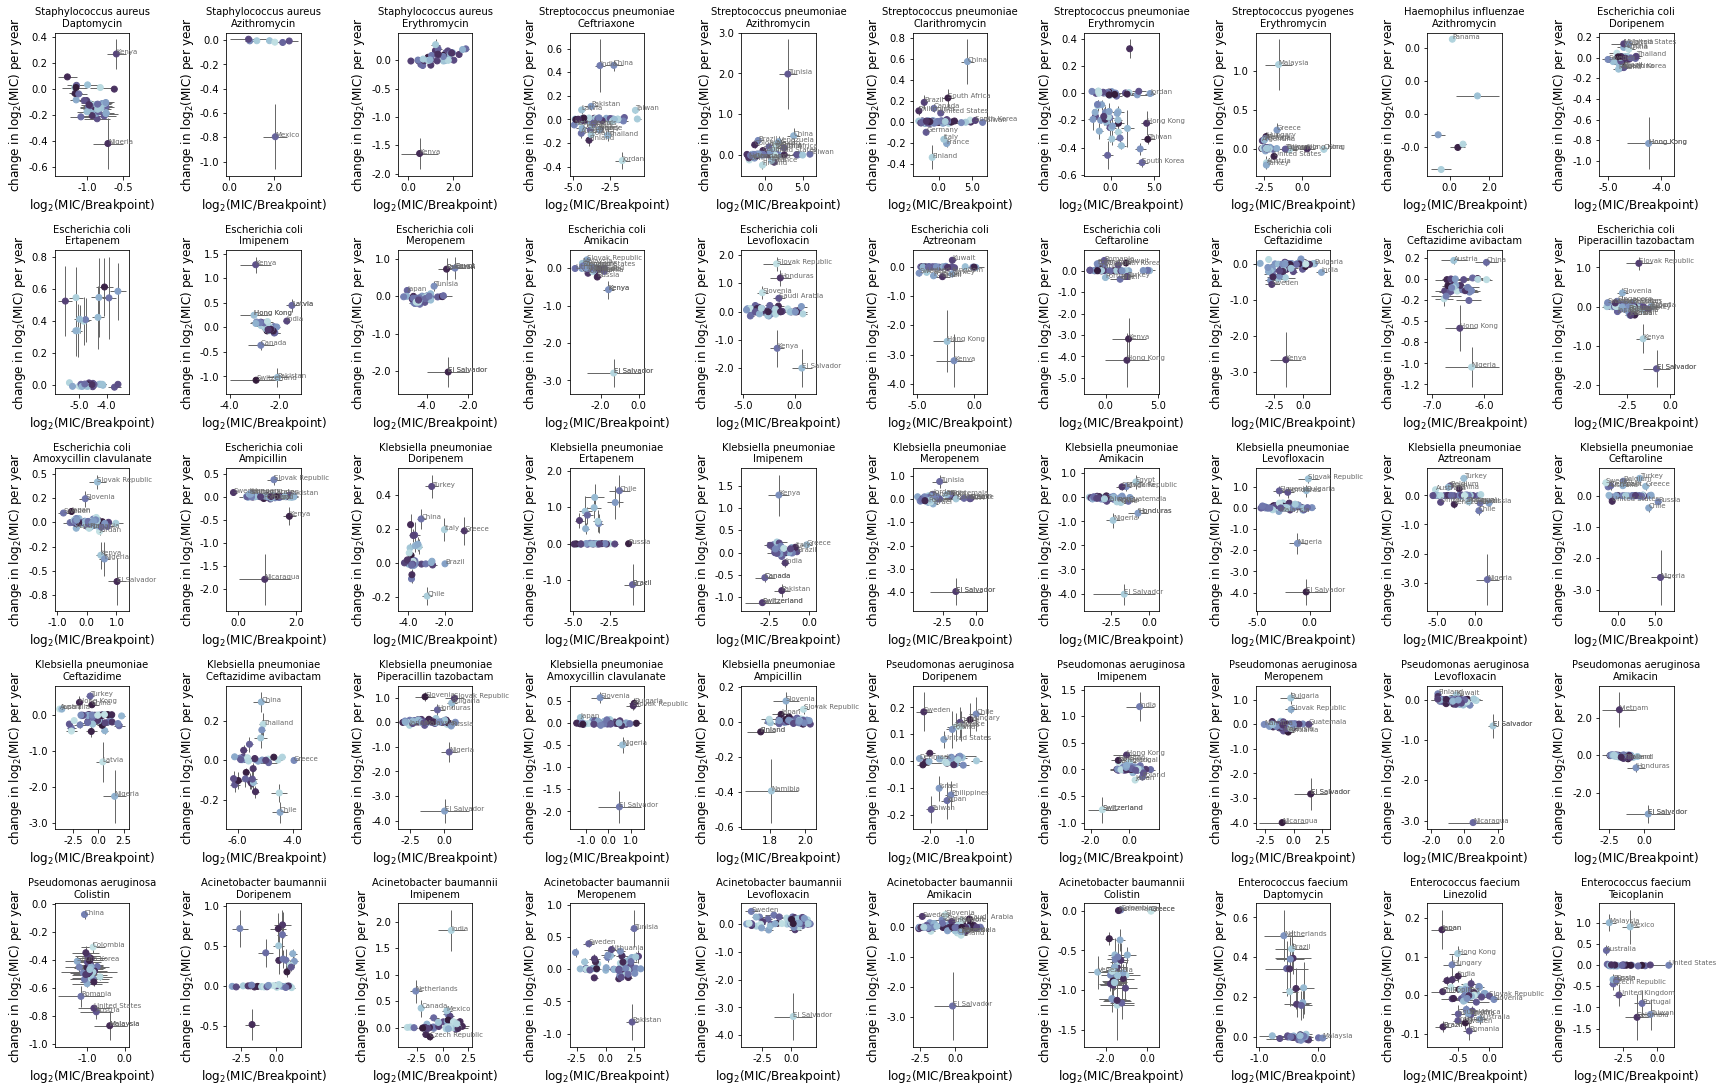

In [72]:
MACRO=['Azithromycin', 'Clarithromycin', 'Erythromycin']
CARBS=['Doripenem', 'Ertapenem', 'Imipenem', 'Meropenem']
AMINO=['Amikacin', 'Gentamicin']
QUINO=['Levofloxacin', 'Moxifloxacin']

fsdL=[('Staphylococcus aureus','Daptomycin')]
fsdL+=list(itertools.product(['Staphylococcus aureus'], MACRO))
fsdL+=[('Streptococcus pneumoniae', 'Ceftriaxone')]
fsdL+=list(itertools.product(['Streptococcus pneumoniae'], MACRO))
fsdL+=list(itertools.product(['Streptococcus pyogenes'], MACRO))
fsdL+=list(itertools.product(['Haemophilus influenzae'], MACRO))
fsdL+=list(itertools.product(['Moraxella catarrhalis'], MACRO))
EcKb=CARBS+AMINO+QUINO+['Aztreonam', 'Aztreonam avibactam', 
     'Ceftaroline', 'Ceftaroline avibactam', 'Ceftazidime',
     'Ceftazidime avibactam', 'Piperacillin tazobactam',
     'Amoxycillin clavulanate', 'Ampicillin', 'Ampicillin sulbactam']
fsdL+=list(itertools.product(['Escherichia coli', 'Klebsiella pneumoniae'], EcKb))
PaAcb=CARBS+QUINO+AMINO+['Colistin', 'ColistinP80']
fsdL+=list(itertools.product(['Pseudomonas aeruginosa', 'Acinetobacter baumannii'], PaAcb))
Ef=['Daptomycin', 'Linezolid', 'Teicoplanin']
fsdL+=list(itertools.product(['Enterococcus faecium'], Ef))

#FIGURE
DFM=pd.read_csv('data/mic_change_per_country.csv')
DFA=pd.read_csv('data/average_mic_per_year.csv')
pC=get_key(DFM,'Country')
maxcols=10
maxrows=int(np.ceil(len(fsdL)/5))
fig=plt.figure(figsize=(maxcols*2.4,maxrows*3))
cmap=sns.cubehelix_palette(n_colors=8, start=.5, rot=-.4, as_cmap=True)
count=0
for position, L in enumerate(fsdL):
    sp=L[0]
    dr=L[1]
    DFMsp=DFM[(DFM.Species==sp) & (DFM.Antibiotic==dr)]
    DFAsp=DFA[(DFA.Species==sp) & (DFA.Antibiotic==dr)]
    if DFMsp.empty or DFAsp.empty: continue
    #GET DATA
    lC=[]
    lM=[]
    lMc=[]
    lErrM=[]
    lErrC=[]
    for country in pC:
        DFMc=DFMsp[DFMsp.Country==country]
        DFAc=DFAsp[DFAsp.Country==country]
        if DFAc.empty or DFMc.empty: continue
        m=DFAc['Average MIC'].mean()
        merr=DFAc['Average MIC'].sem()
        mc=DFMc['MIC change'].mean()+np.random.normal(0,0.01,1)
        mcerr=DFMc['MIC change error'].mean()
        lC.append(country)
        lM.append(m)
        lErrM.append(merr)
        lMc.append(mc)
        lErrC.append(mcerr)
    #PLOT
    ax=fig.add_subplot(maxrows, maxcols, count+1)
    count+=1
    c=np.random.uniform(0,1,len(lM))
    ax.errorbar(lM, lMc, xerr=lErrM, yerr=lErrC, fmt='o', markersize=1, ecolor='dimgrey', linewidth=1, zorder=1)
    ax.scatter(lM, lMc, color=cmap(c), zorder=2)
    #COMPUTE OUTLIERS
    Q1 = np.percentile(lMc, 25)
    Q3 = np.percentile(lMc, 75)
    IQR = Q3 - Q1
    for tc1, country in enumerate(lC):
        if country=='Korea, South':
            country='South Korea'
        if lMc[tc1]<(Q3+1.5*IQR) and lMc[tc1]>(Q1-1.5*IQR): continue
        if abs(lMc[tc1])<1e-4: continue
        print(sp,dr,Q1,Q3,lMc[tc1],country)
        ax.text(lM[tc1], lMc[tc1], country, color='dimgrey', fontsize=7)
    Q1 = np.percentile(lM, 25)
    Q3 = np.percentile(lM, 75)
    IQR = Q3 - Q1
    for tc1, country in enumerate(lC):
        if country=='Korea, South':
            country='South Korea'
        if lM[tc1]<(Q3+1.5*IQR) and lM[tc1]>(Q1-1.5*IQR): continue
        ax.text(lM[tc1], lMc[tc1], country, color='dimgrey', fontsize=7)
    ax.set_xticklabels(ax.get_xticks(), fontsize=10) 
    ax.set_yticklabels(ax.get_yticks(), fontsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlabel('log$_2$(MIC/Breakpoint)', fontsize=12)
    ax.set_ylabel('change in log$_2$(MIC) per year', fontsize=12)
    ax.set_title(sp+'\n'+dr, fontsize=10)
fig.tight_layout()

# SUPPLEMENTARY FIGURE 22

/home/pcatalan/MEGA/notas/mic_paper/functions.py:381: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticks())


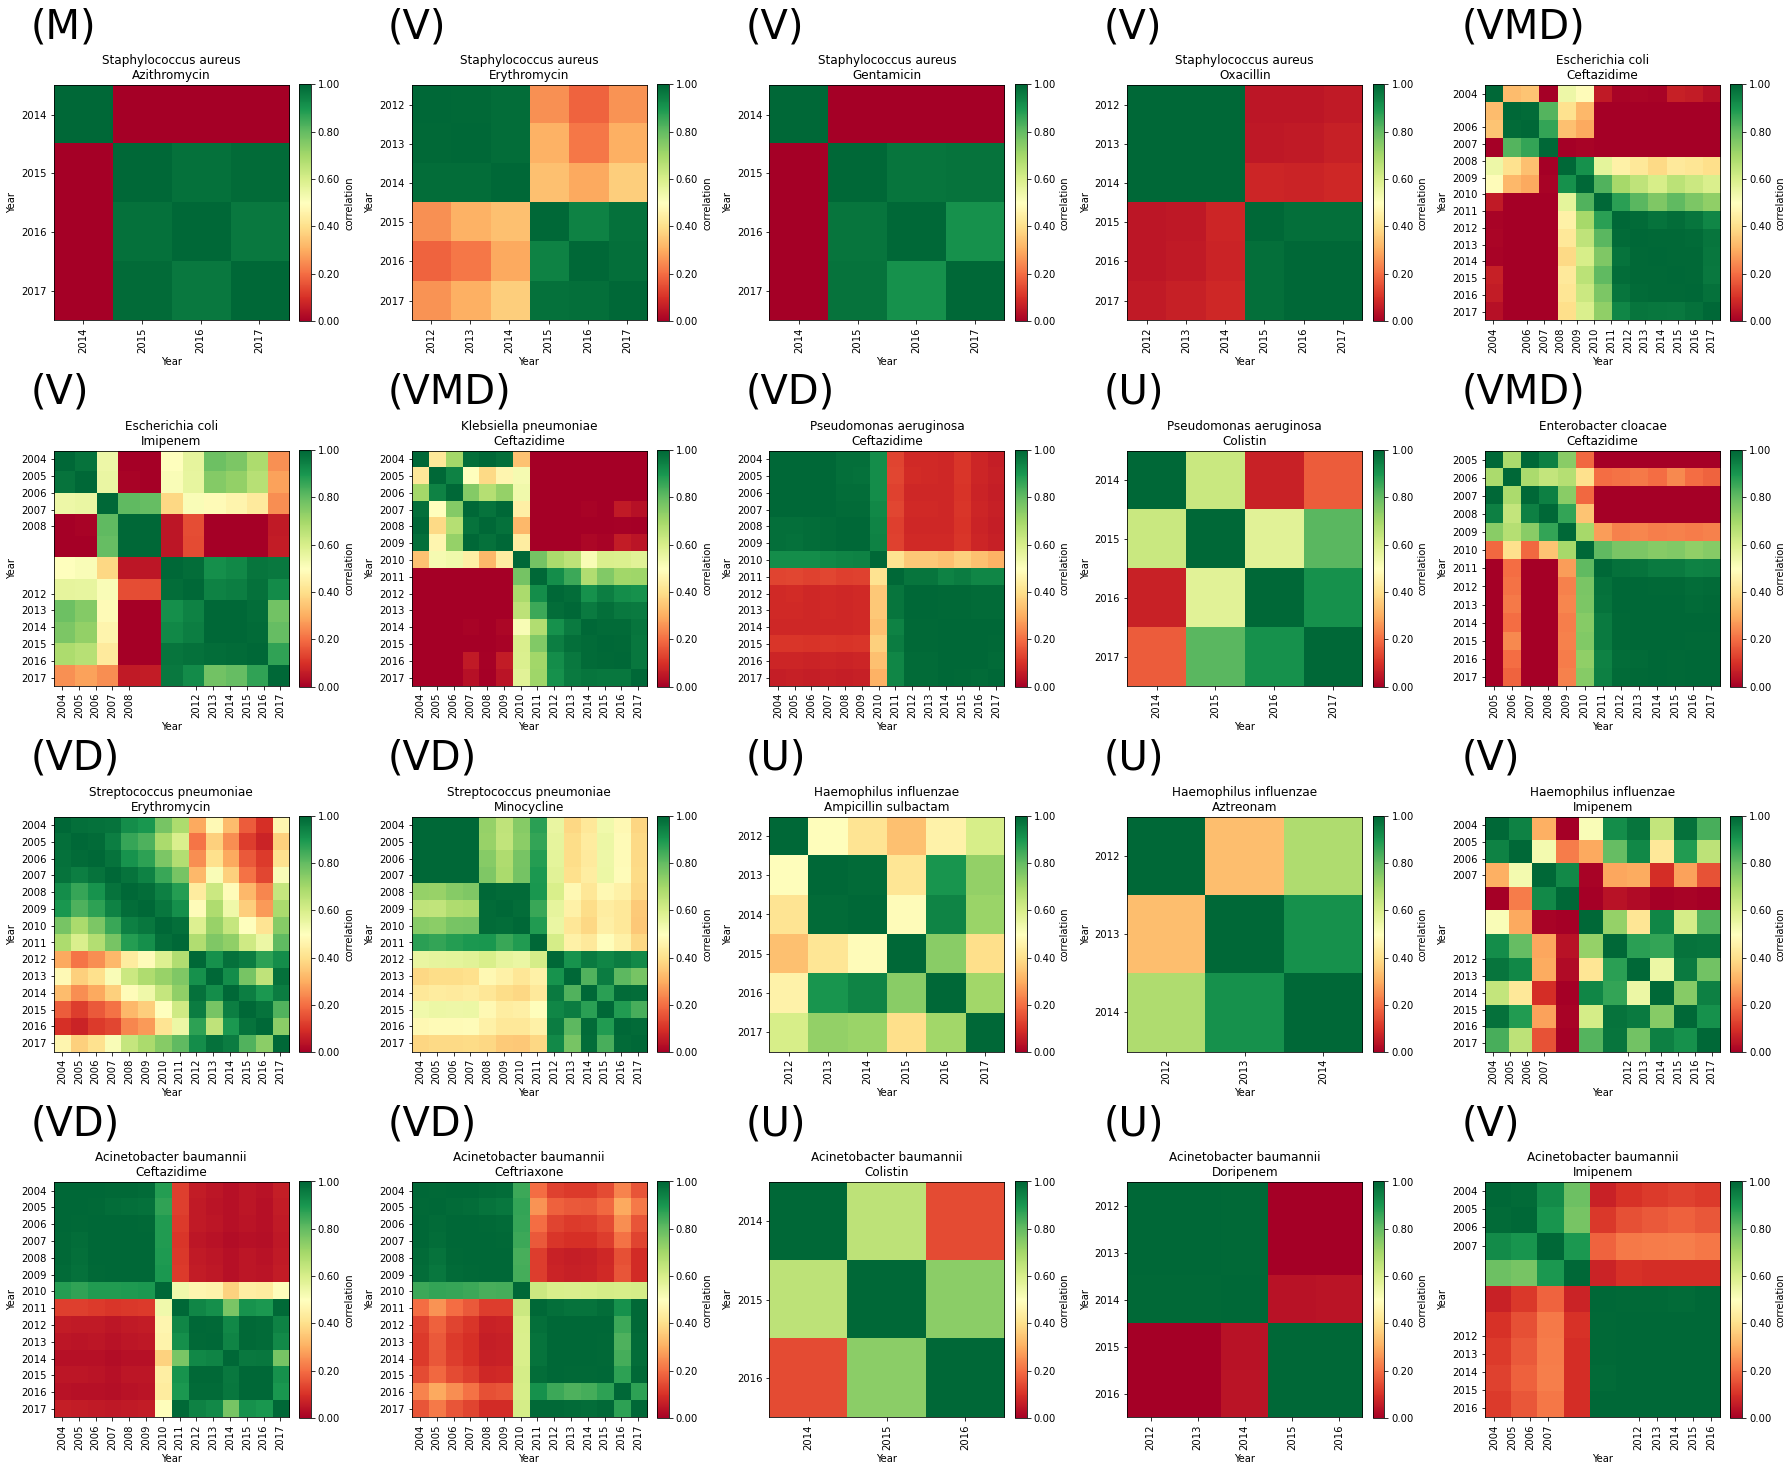

In [74]:
DFdist=pd.read_csv('results/correlations/tau_test.csv')
Diff=pd.read_csv('results/Rcluster/resistant_cluster_values_test_vs_inform.csv')
SS=pd.read_csv('data/average_mic_per_year_complete.csv')

SN=[]
SV=[]
SM=[]
SD=[]
for index,row in DFdist.iterrows():
    sp=row['Species']
    dr=row['Antibiotic']
    SSsp=SS[(SS.Species==sp) & (SS.Antibiotic==dr)]
    N=SSsp['Number of cases'].mean()
    V=SSsp['Number of cases'].std()
    M=SSsp['Number of cases'].min()
    SN.append(N)
    SV.append(V)
    SM.append(M)
    Diffsp=Diff[(Diff.Species==sp) & (Diff.Antibiotic==dr)]
    if Diffsp.empty: continue
    D=Diffsp['Diff'].mean()
    SD.append(D)
SN=np.array(SN)
SV=np.array(SV)
SM=np.array(SM)
SD=np.array(SD)
N1=np.quantile(SN,0.25)
V1=np.quantile(SV,0.75)
M1=np.quantile(SM,0.25)
D1=np.quantile(SD,0.75)


#BAD CORRELATIONS BUT FOR FIG 4
DFdist=pd.read_csv('results/correlations/tau_fig4.csv')
DFdist=DFdist[DFdist.Tau<0.25]
maxcols=5
maxrows=int(len(DFdist)/maxcols+1)
fig=plt.figure(figsize=(5*maxcols,5*maxrows))
#GENERATE FIGURE
Ns=0
Nv=0
Nm=0
Nd=0
Nu=0
List=[]

c=1
for index,row in DFdist.iterrows():
    sp=row['Species']
    dr=row['Antibiotic']
    tau=row['Tau']
    ax=fig.add_subplot(maxrows,maxcols,c)
    c=c+1
    R,Y=read_corr(sp,dr)
    I=plot_corr(R,Y,ax,fig,sp+'\n'+dr)
    L='('
    title=sp+'\n'+dr
    #check if sample size issue
    SSsp=SS[(SS.Species==sp) & (SS.Antibiotic==dr)]
    N=SSsp['Number of cases'].mean()
    V=SSsp['Number of cases'].std()
    M=SSsp['Number of cases'].min()
    #print(N,V)
    if N<N1:
        L+='N'
        Ns+=1
    if V>V1:
        L+='V'
        Nv+=1
    if M<M1:
        L+='M'
        Nm+=1
    #check if data curation issue
    Diffsp=Diff[(Diff.Species==sp) & (Diff.Antibiotic==dr)]
    D=Diffsp['Diff'].mean()
    if D>D1:
        L+='D'
        Nd+=1
    L+=')'
    if L=='()':
        L='(U)'
        Nu+=1
    FS=40
    ax.text(-0.10,1.20,L,fontsize=FS,transform=ax.transAxes)
fig.tight_layout()

# SUPPLEMENTARY FIGURE 23

955 3379 0.28262799644865344


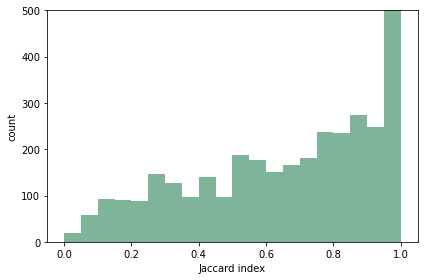

In [76]:
def make_dict(L):
    D={}
    for k in L:
        if k not in D:
            D[k]=0
        D[k]+=1/len(L)
    return D

def jaccard(R,S,CL):
    N=0
    D=0
    for k in CL:
        v1=0
        v2=0
        if k in R:
            v1=1#R[k]
        if k in S:
            v2=1#S[k]
        N+=min(v1,v2)
        D+=max(v1,v2)#v1+v2
    return N/D

pL=read_key('Species','data/')
drugs=read_key('Drugs','data/')
CL=read_key('Country', 'data/')
Y=range(2004,2018)
J=[]
for sp,dr in itertools.product(pL,drugs):
    try:
        R=pd.read_csv('results/Rcluster/'+sp+'_'+dr+'_Rcluster.csv')
        S=pd.read_csv('results/Rcluster/'+sp+'_'+dr+'_Scluster.csv')
    except:
        x=0
        continue
    if R.empty or S.empty: continue
    for y in Y:
        Ry=list(R[R.Year==y]['Country'])
        Sy=list(S[S.Year==y]['Country'])
        if not (Ry and Sy): continue
        Rd=make_dict(Ry)
        Sd=make_dict(Sy)
        j=jaccard(Rd,Sd,CL)
        J.append(j)

#FIGURE
color1='#006837'
fig=plt.figure()
ax=plt.gca()
bins=np.linspace(0,1,21)
n,bins=np.histogram(J,bins=bins)
n1=[]
b1=[]
w=(bins[1]-bins[0])/2
for x,y in zip(bins,n):
    if y>0:
        n1.append(y)
        b1.append(x+w)
ax.bar(b1,n1, width=2*w, facecolor=color1, alpha=0.5)
ax.set_xlabel('Jaccard index')
ax.set_ylabel('count')         
ax.set_ylim([0,500])
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f')) 
fig.tight_layout()

Jn=np.array(J)
a=Jn[Jn<0.5]
print(len(a), len(J), len(a)/len(J))